# **Random Forrest**

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Cleaning

In [2]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

### Binary Classification

In [3]:
# train test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Check decision_tree notebook for background of hyperparameters
clf = RandomForestClassifier(
    min_impurity_decrease=0.001,
    min_samples_leaf=7,
    min_samples_split=8,
    n_estimators=10,
    max_depth=6,
)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=7, min_samples_split=8,
                       n_estimators=10)

In [5]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

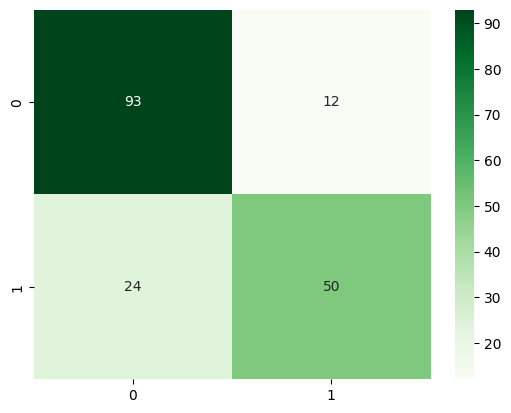

In [6]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

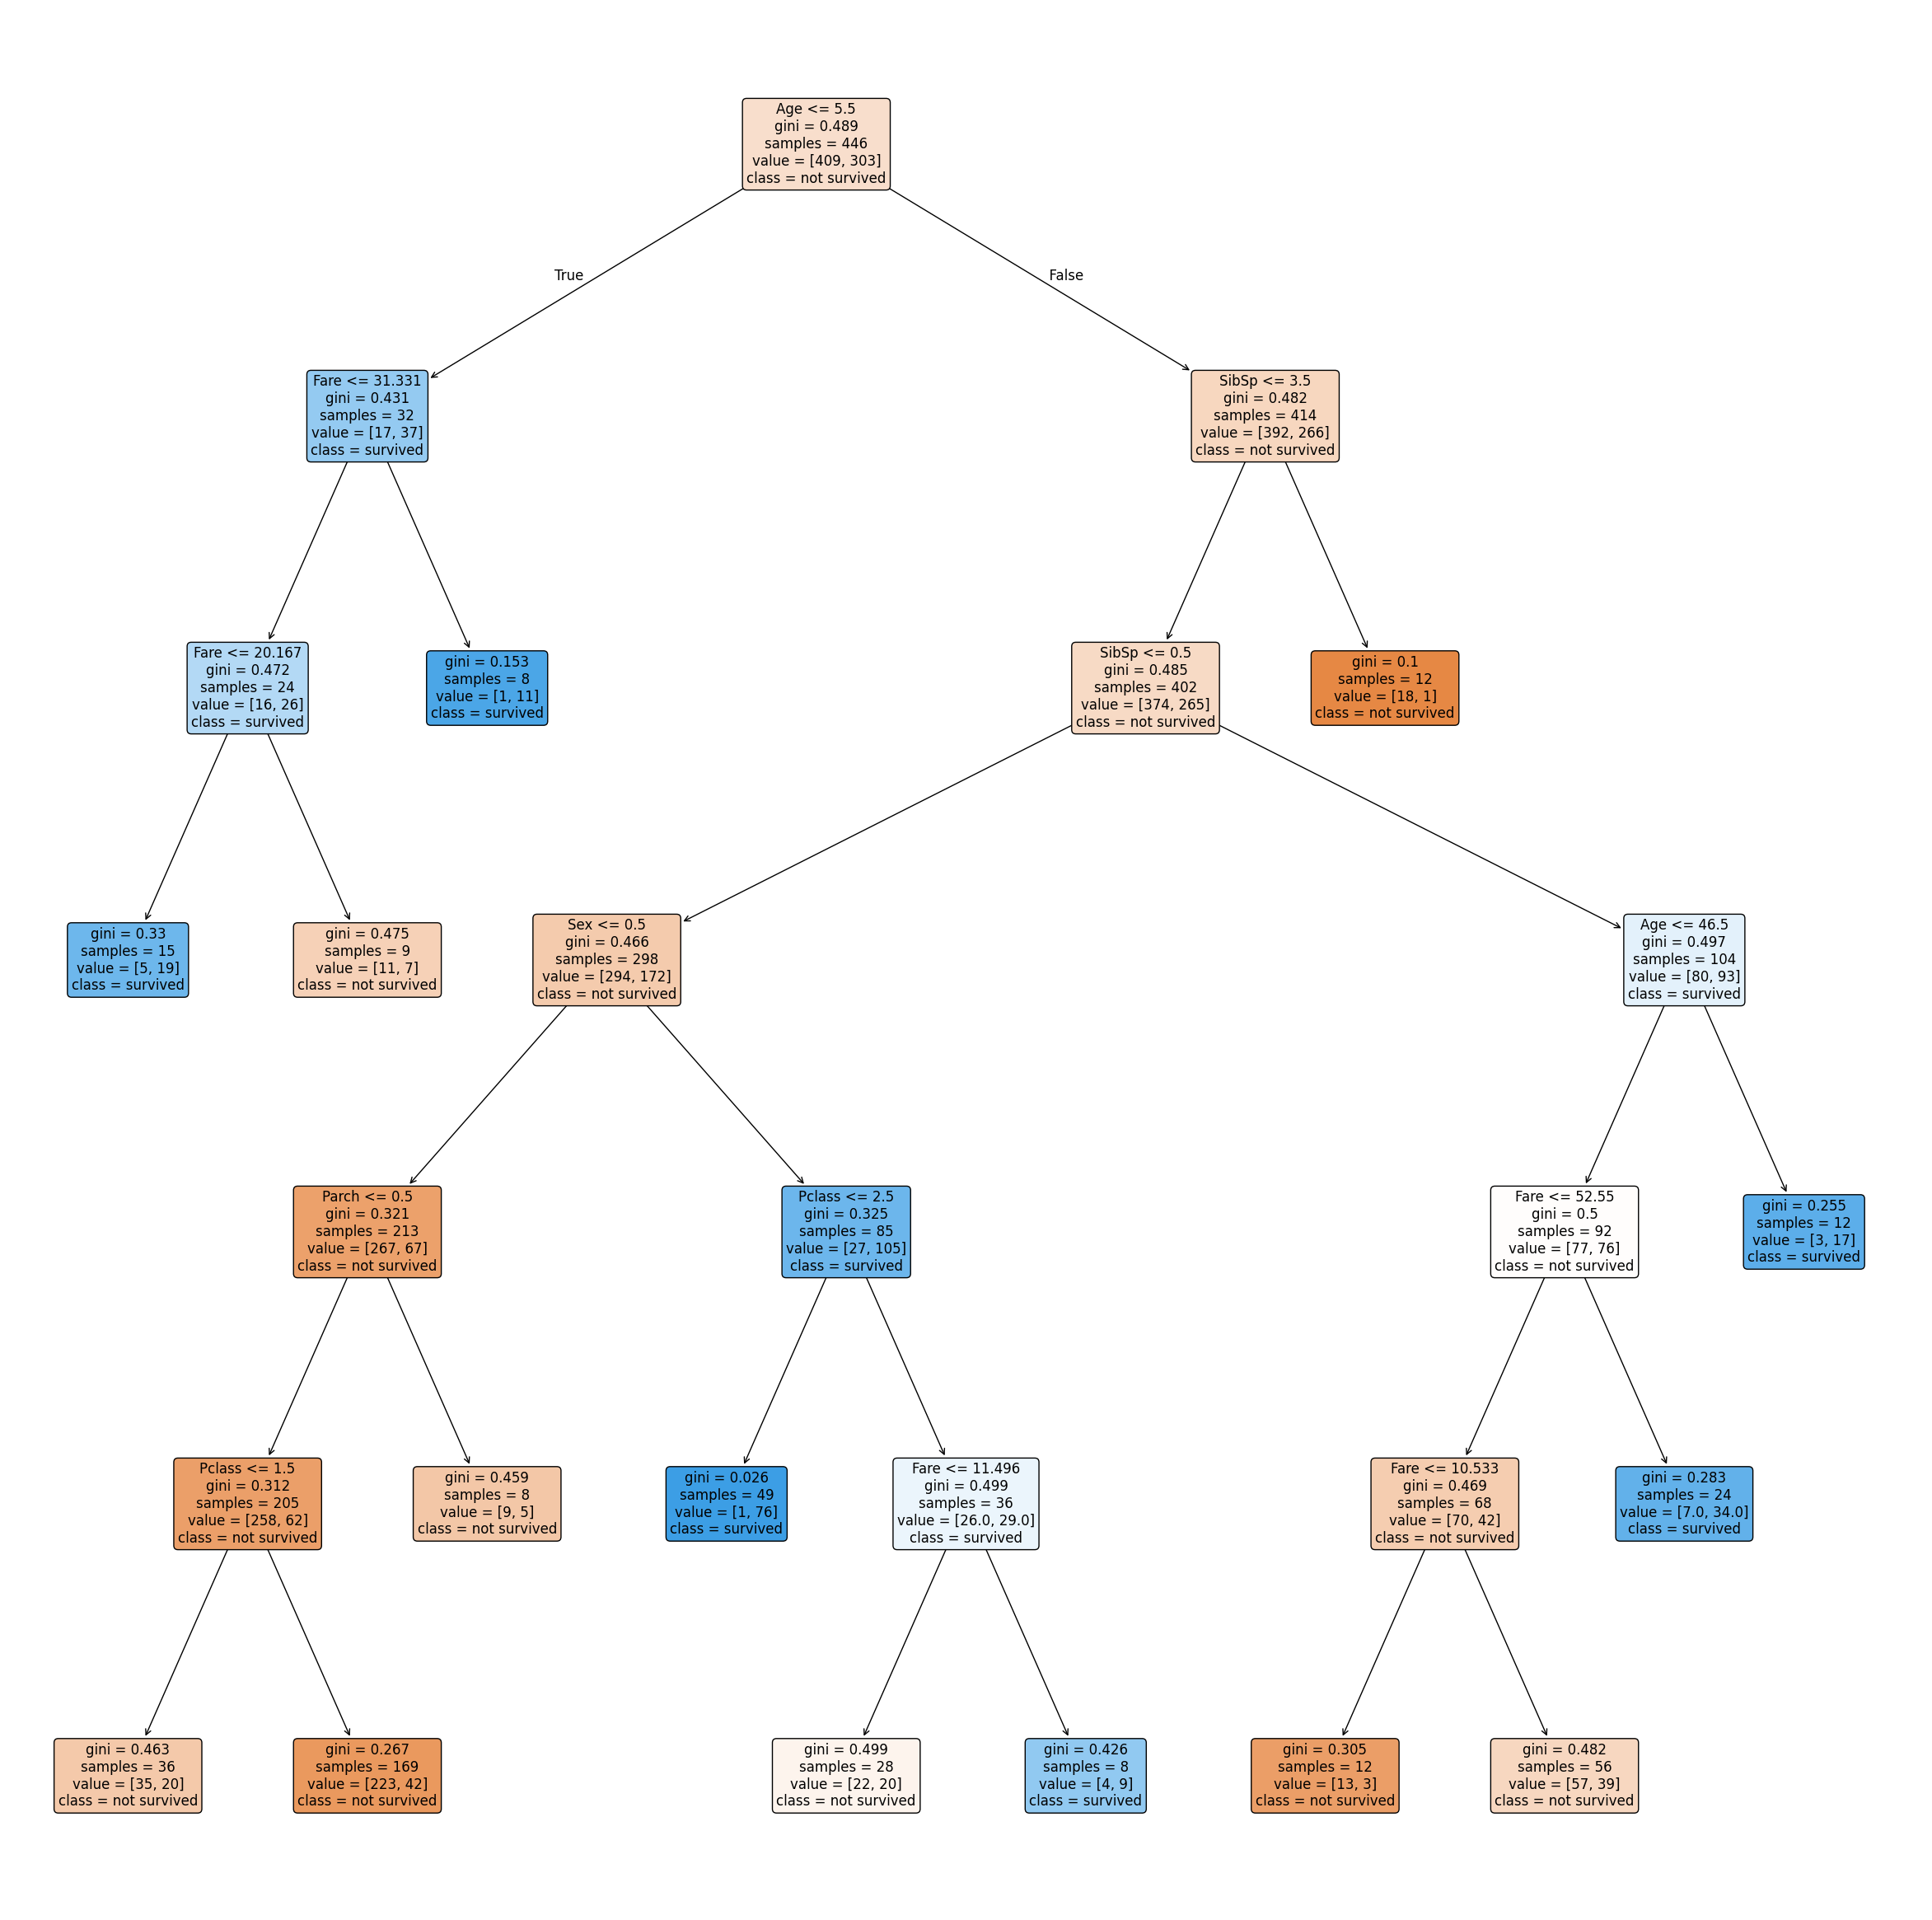

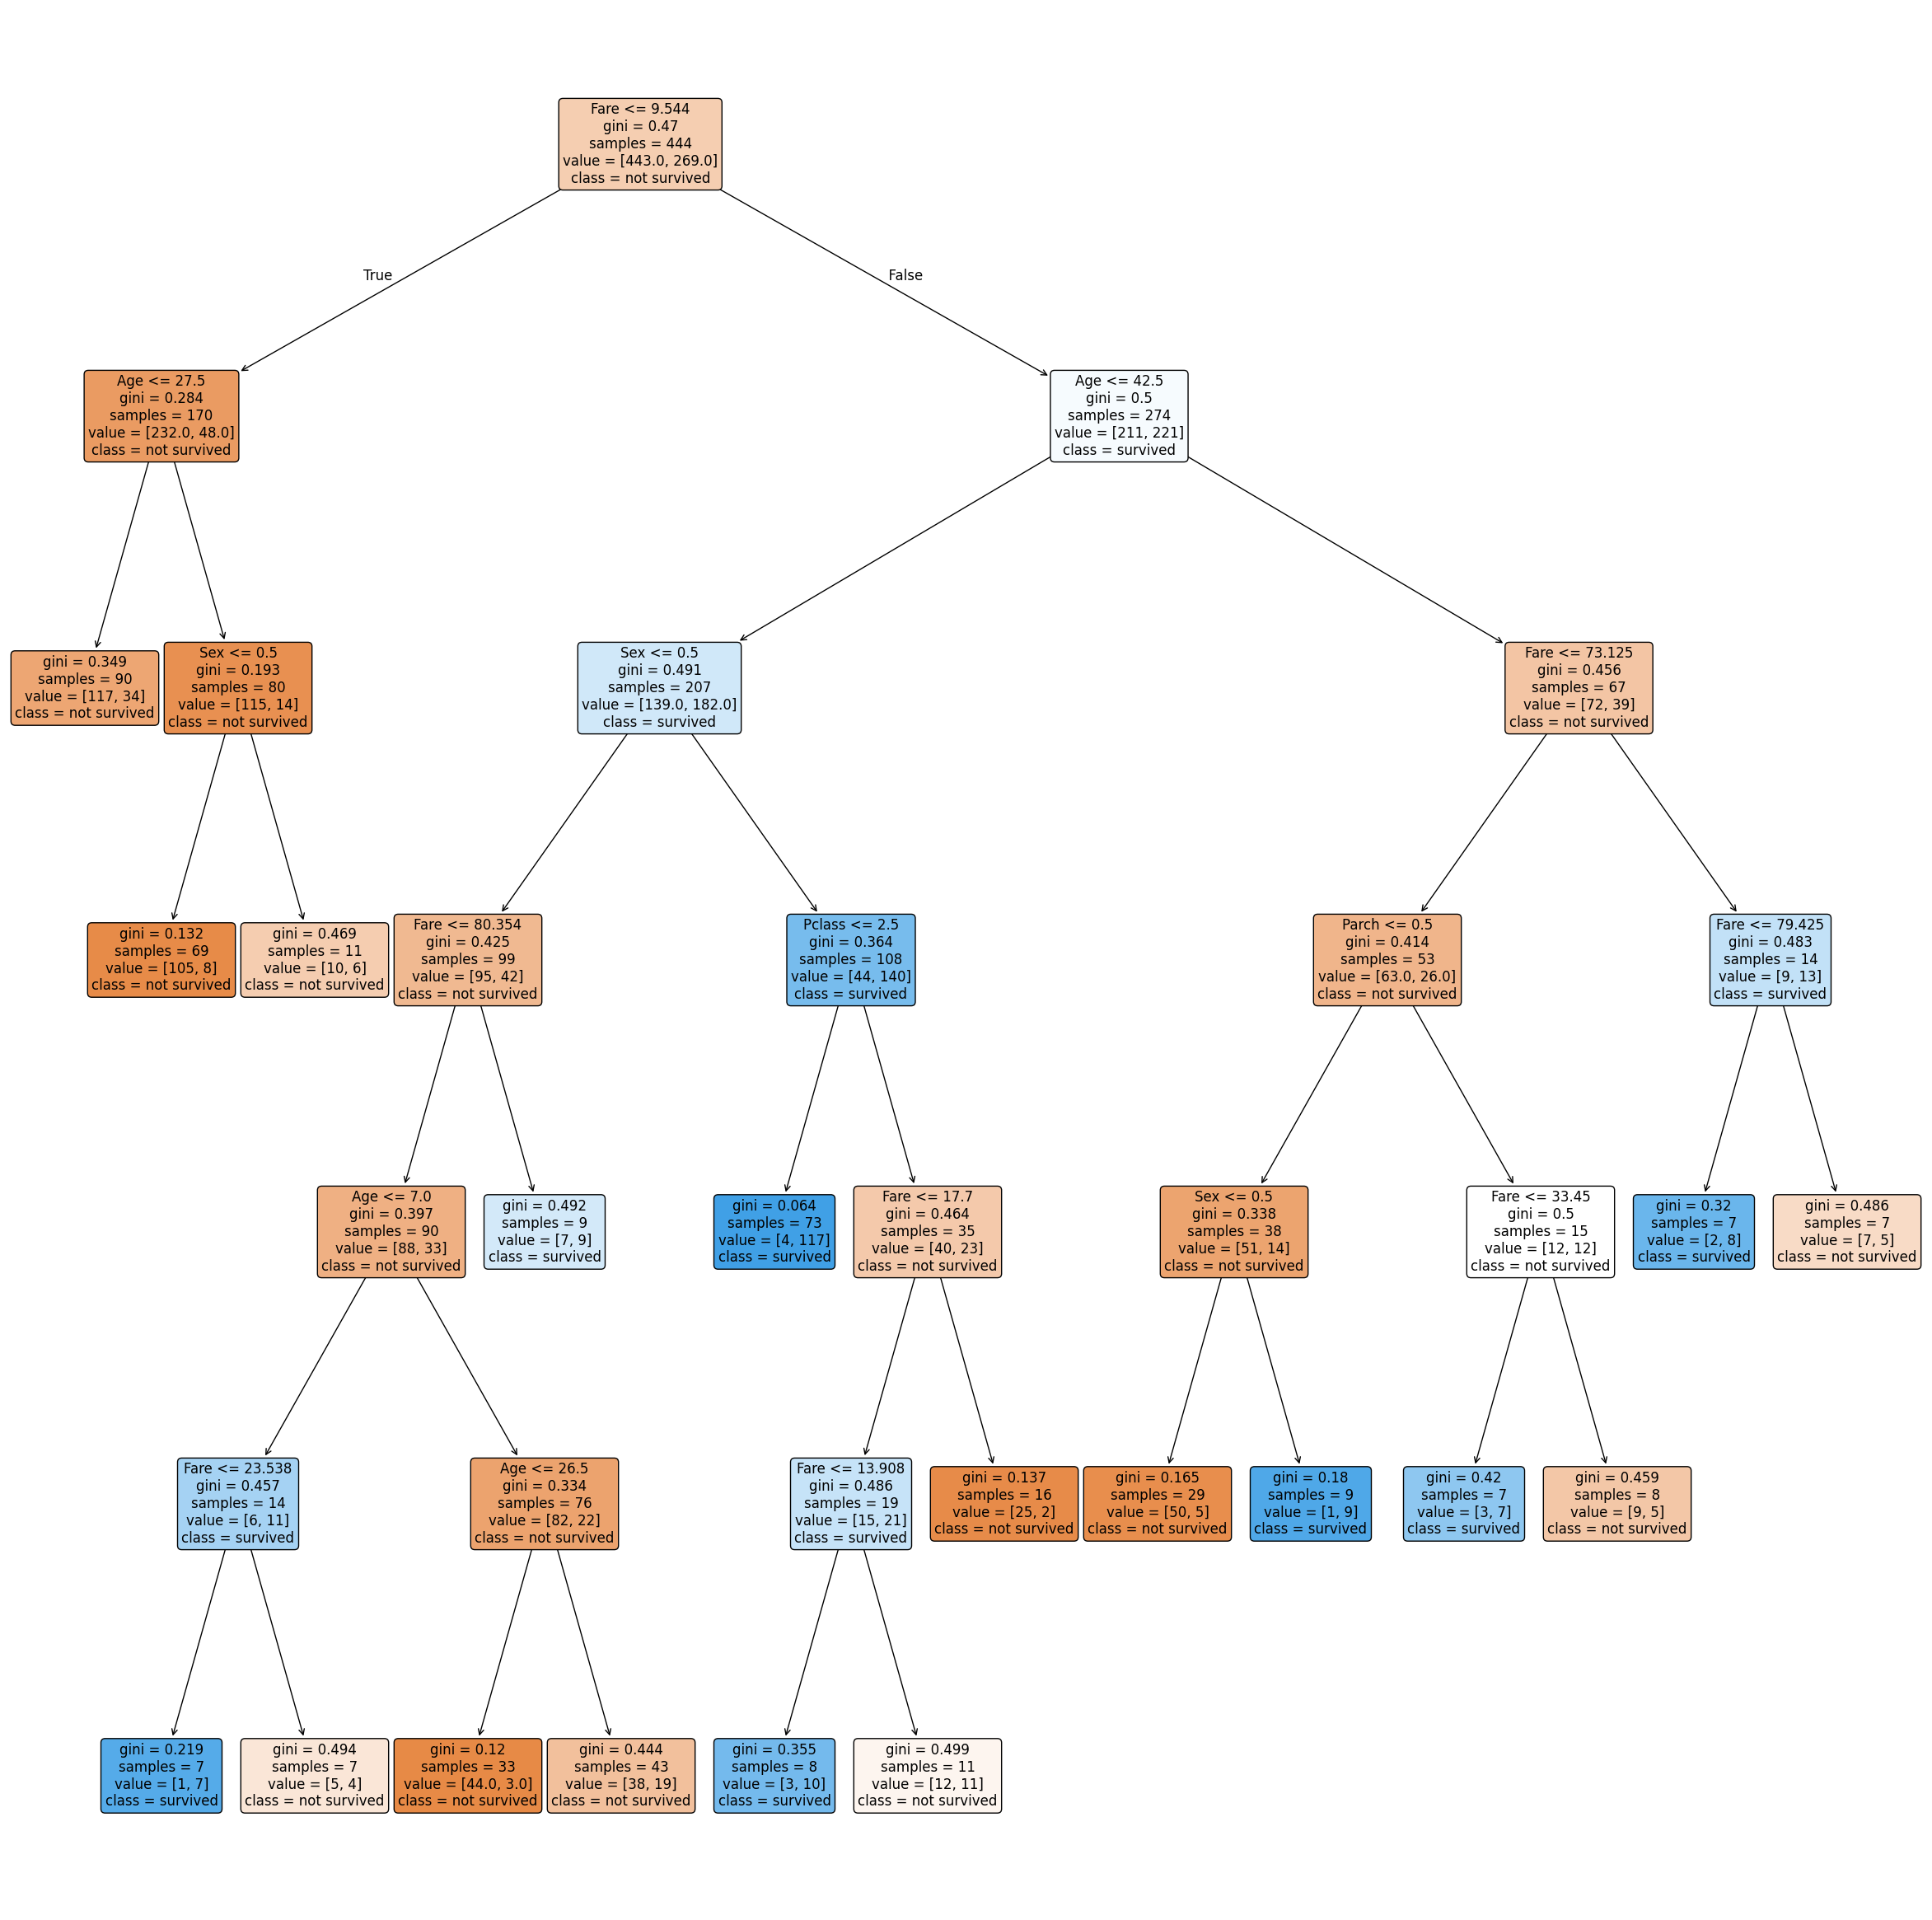

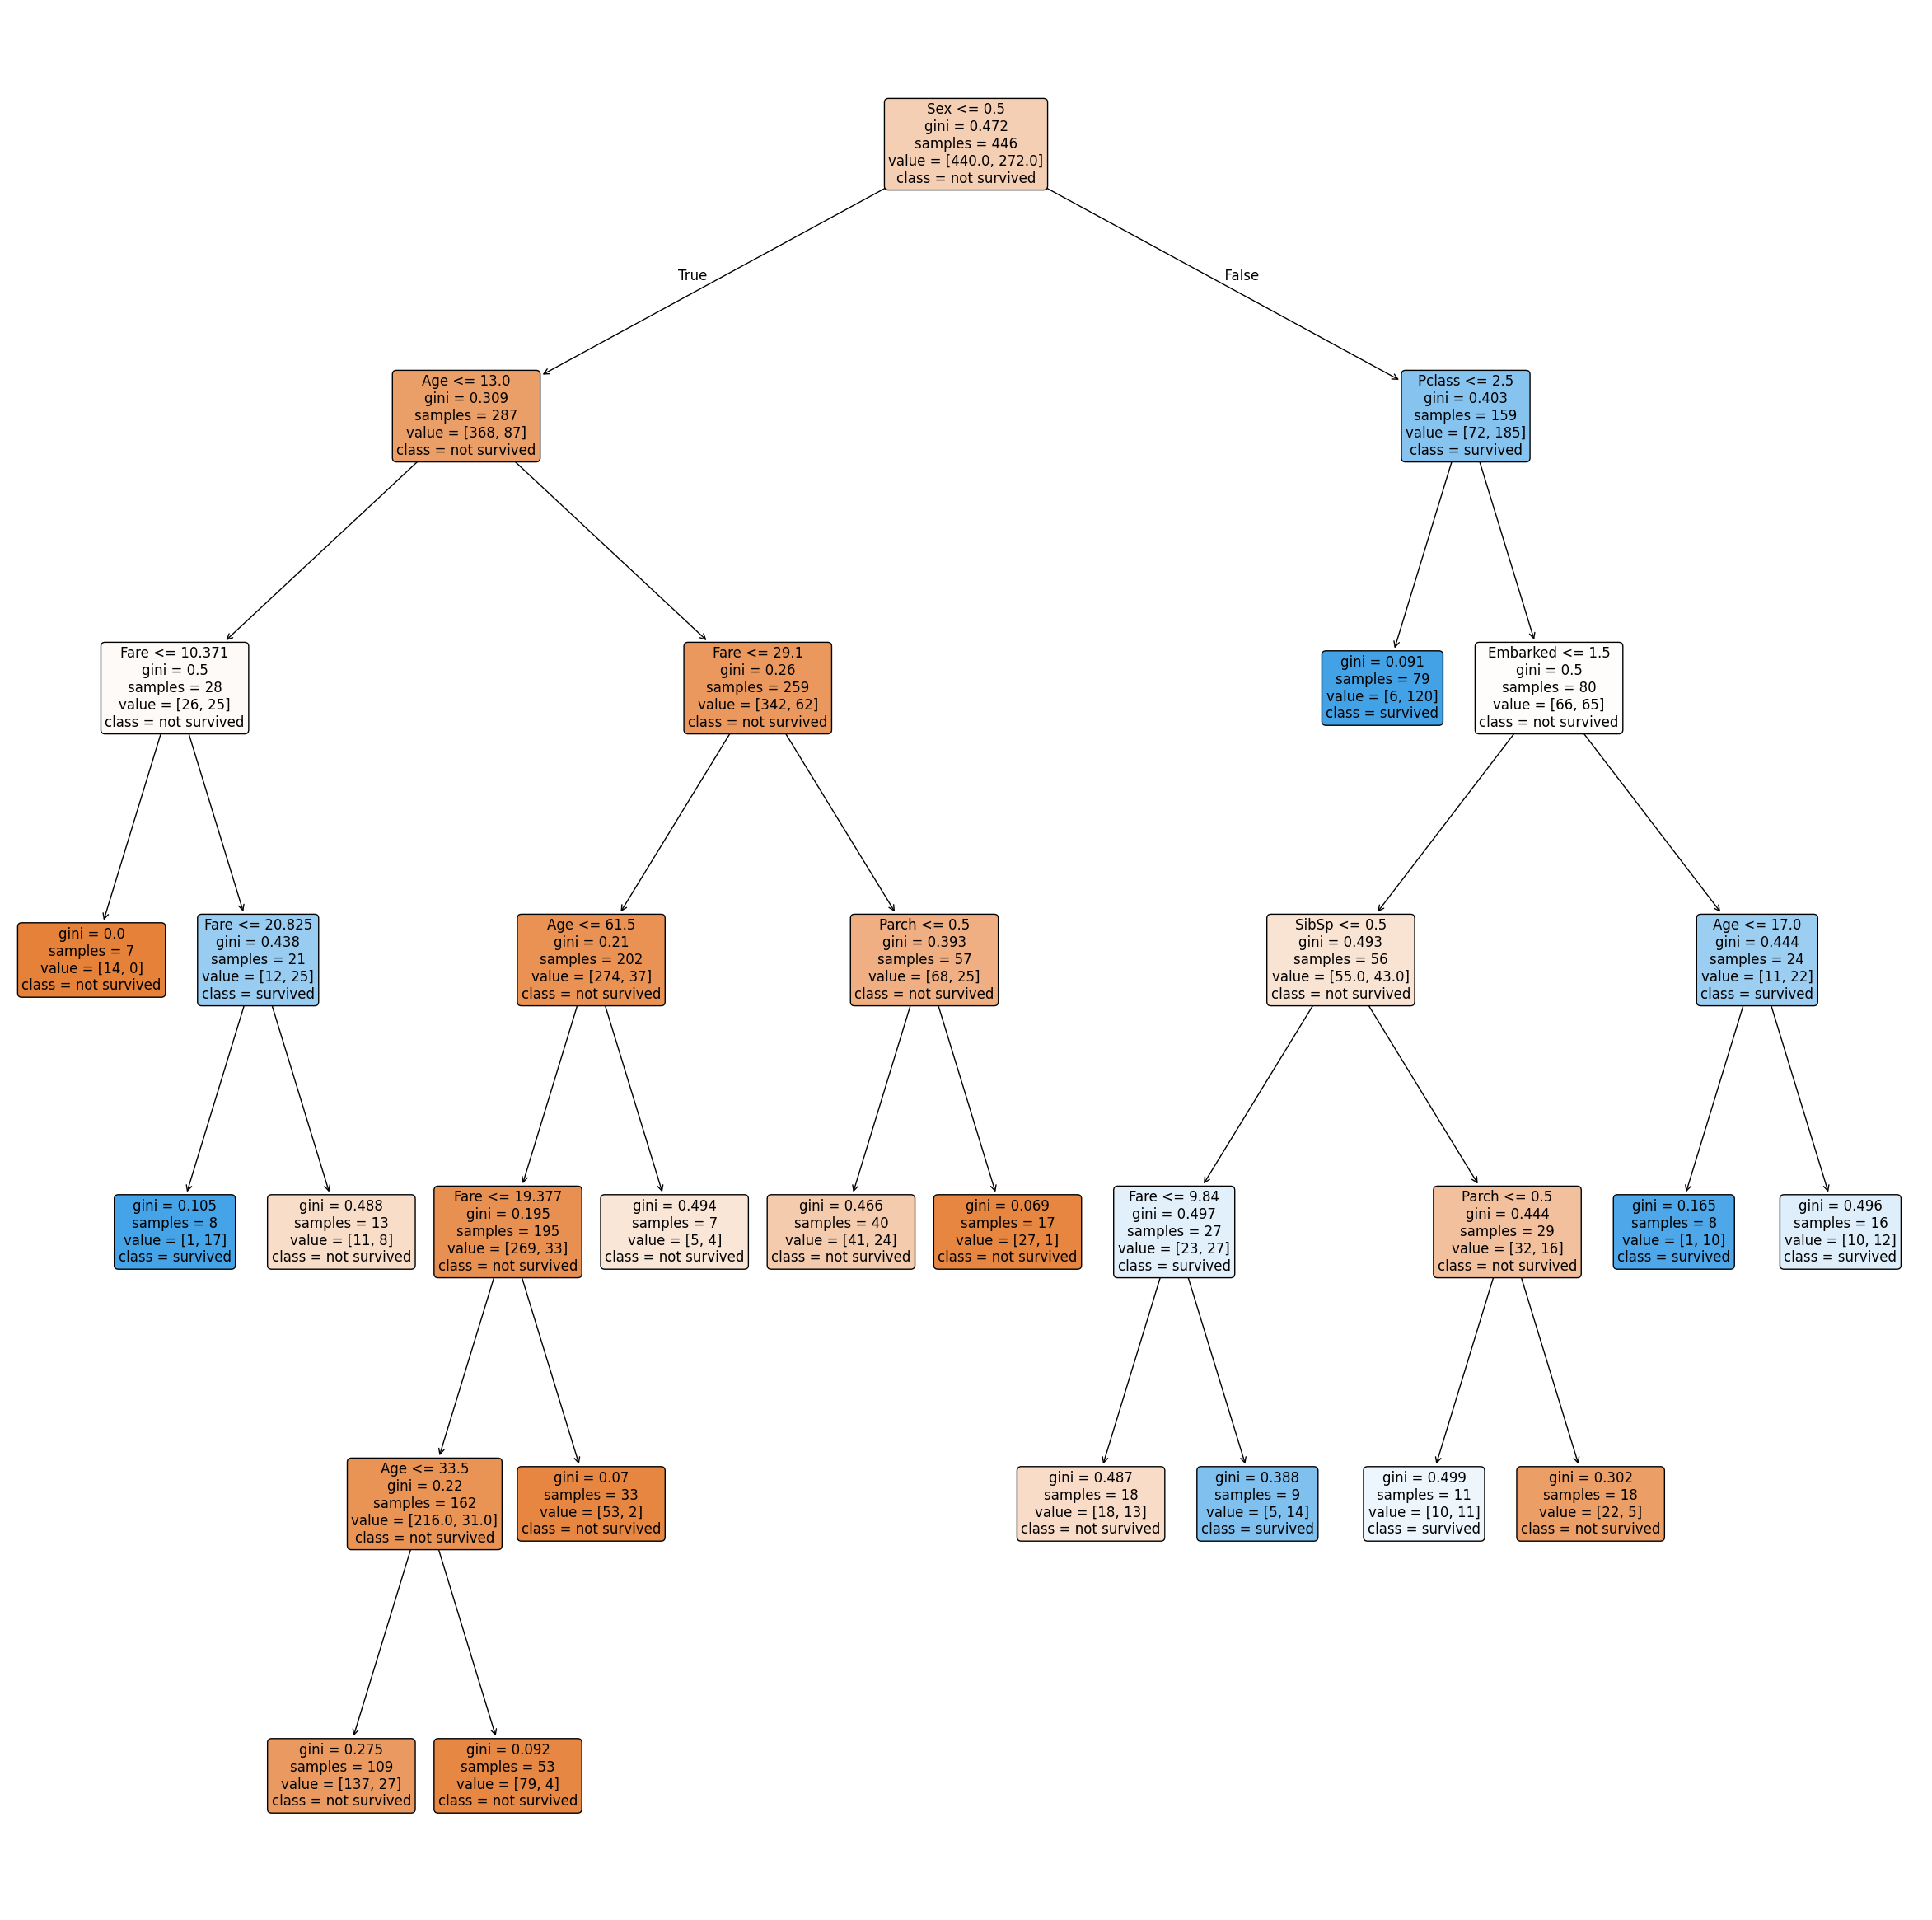

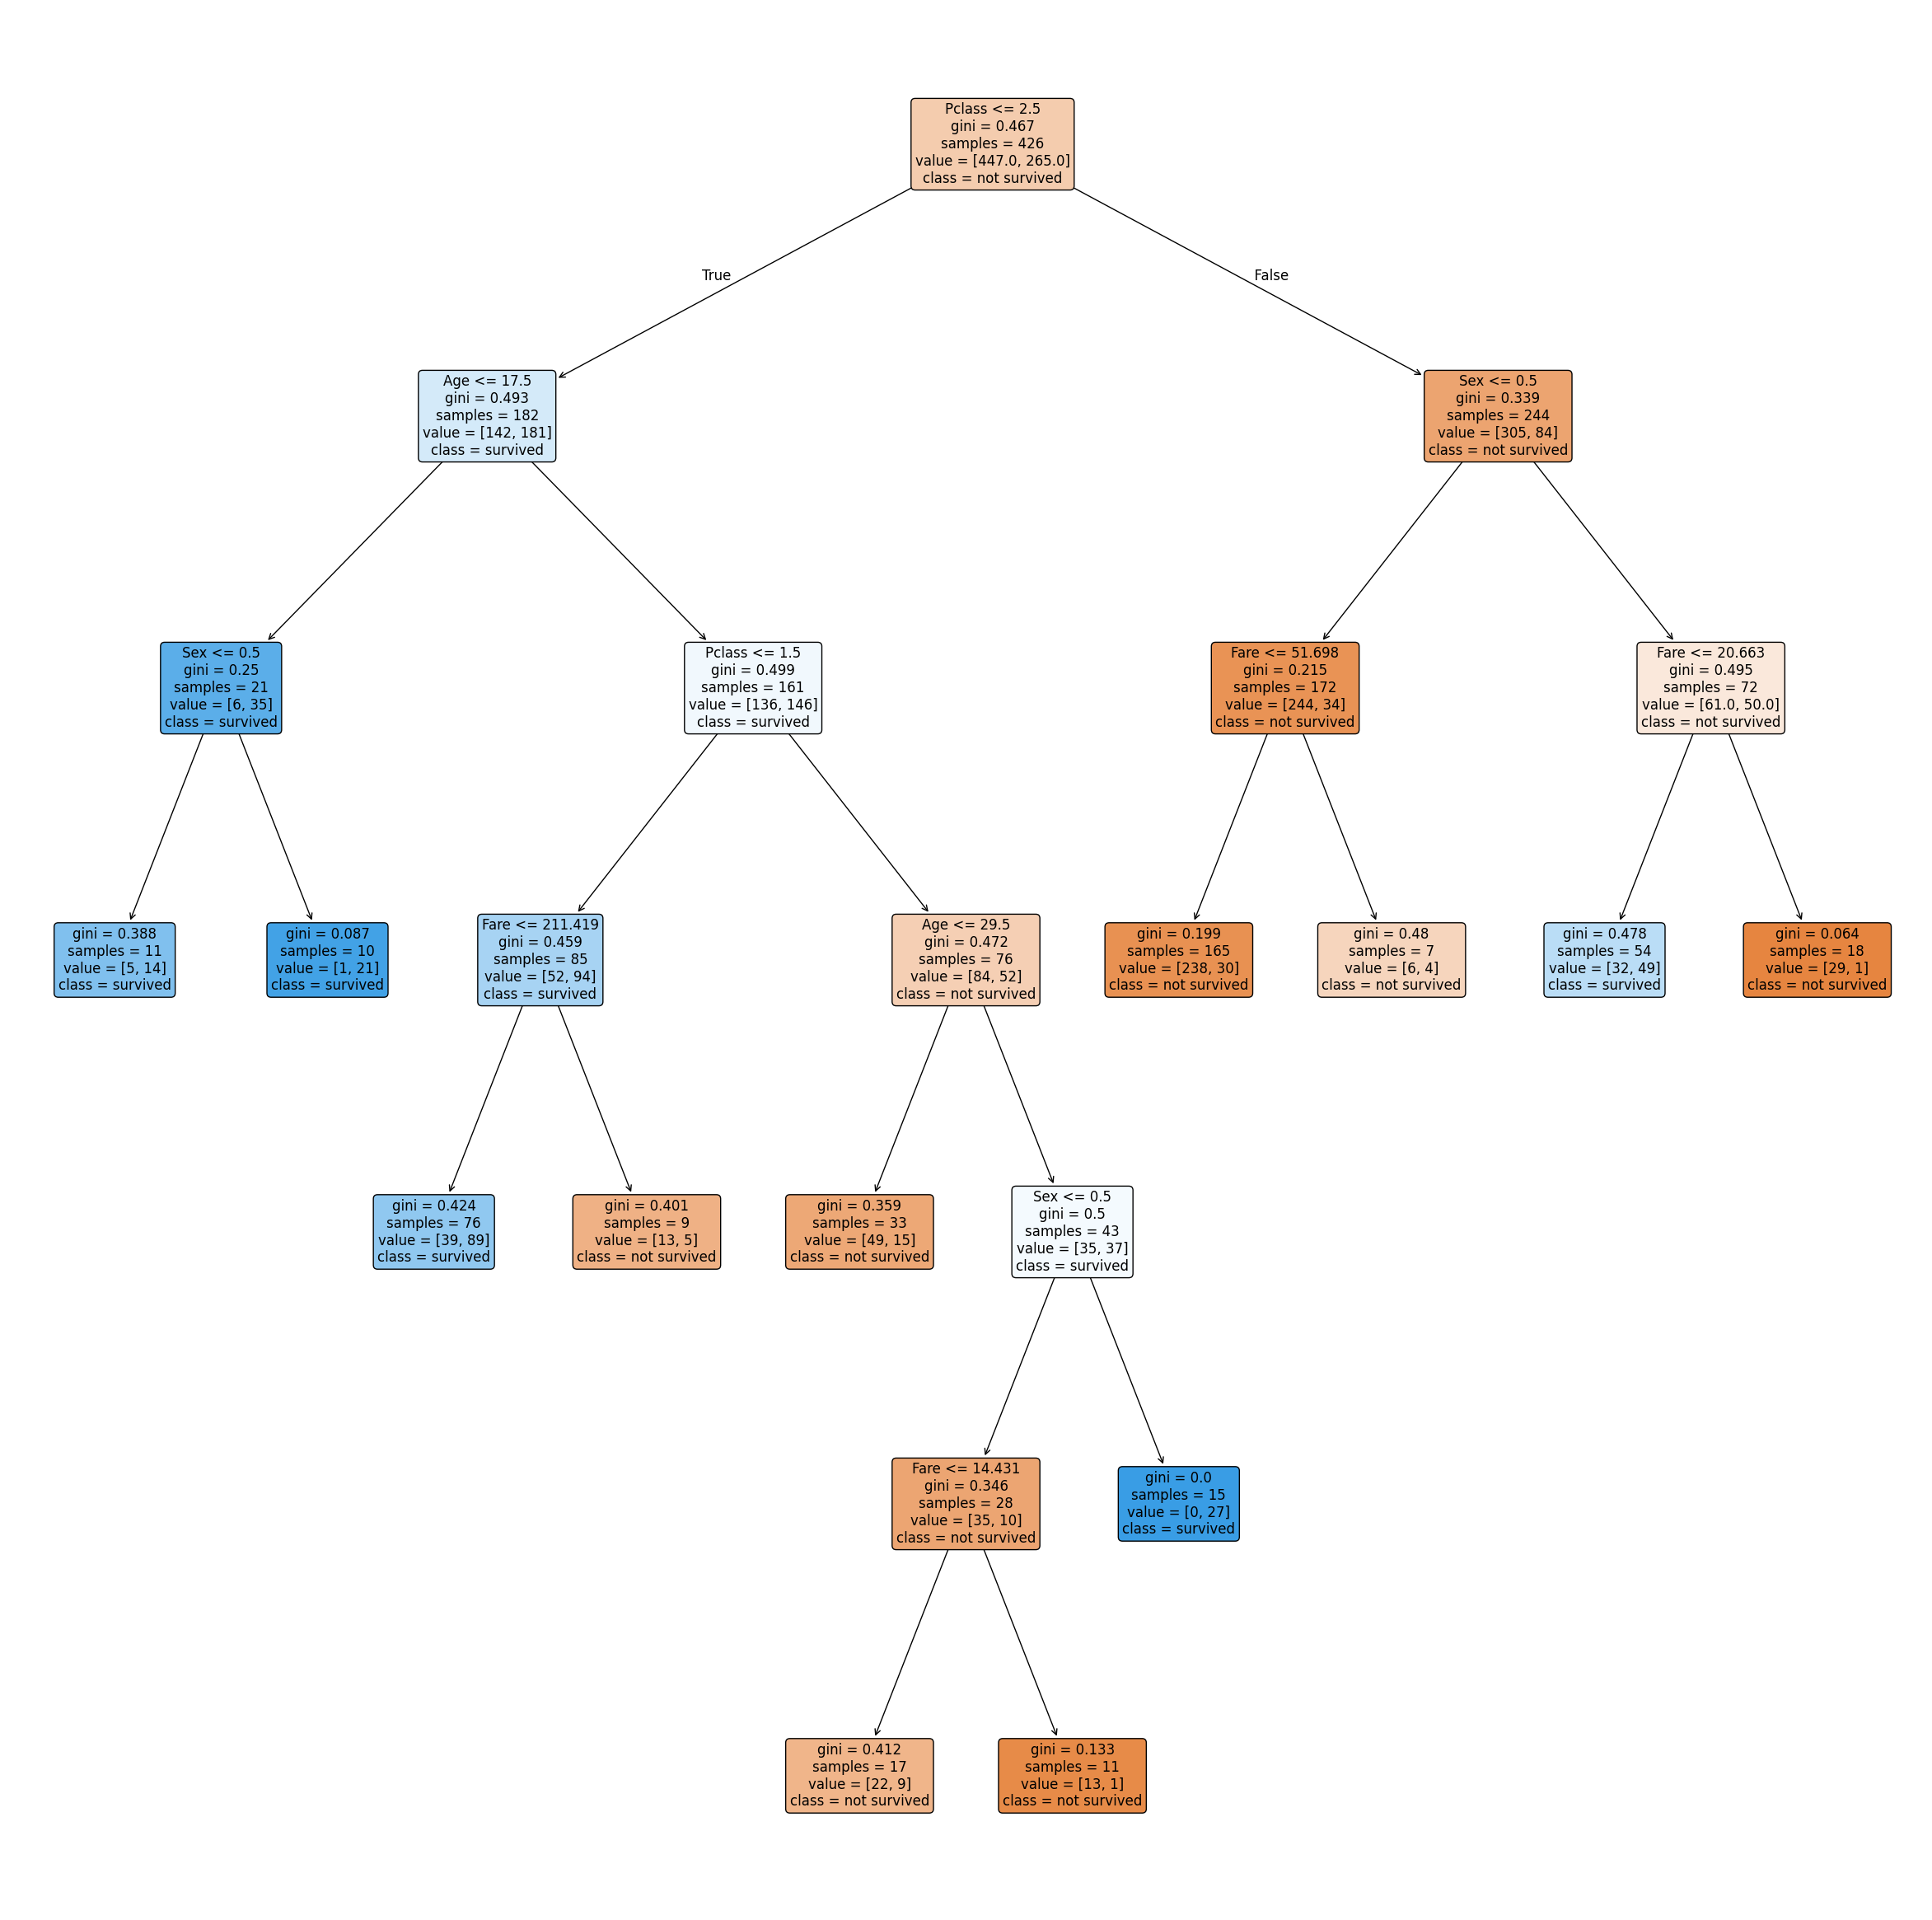

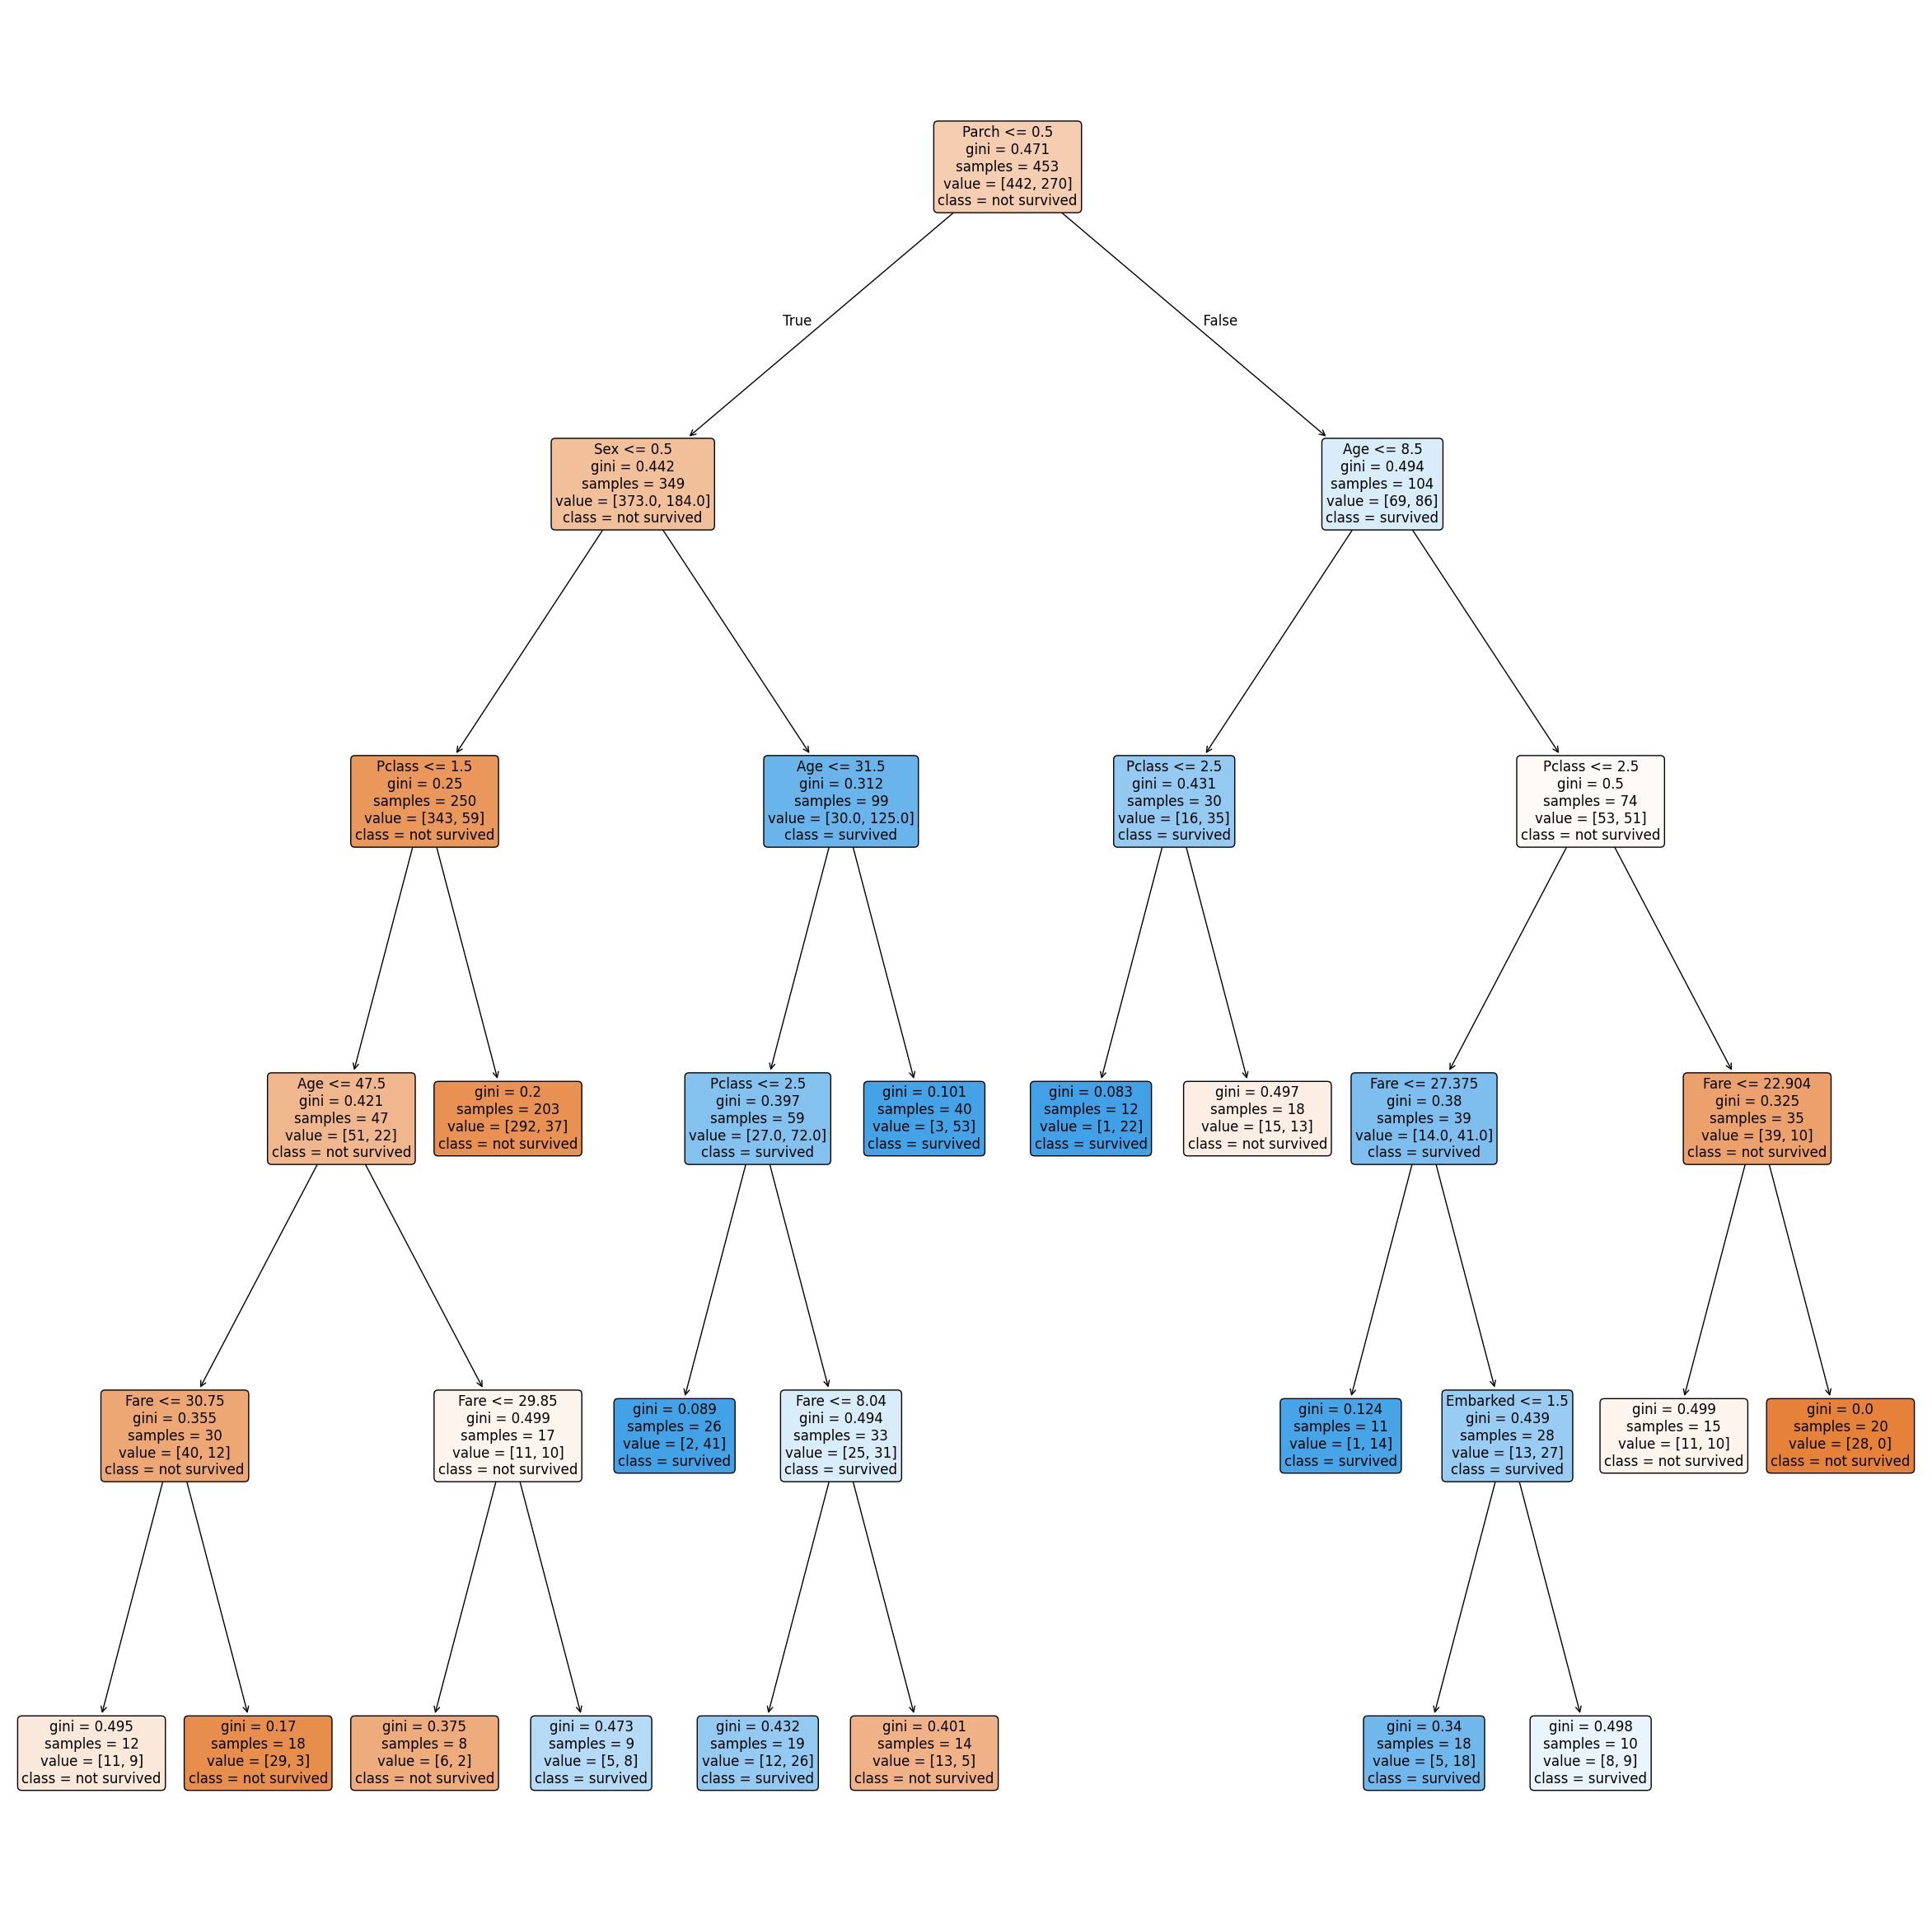

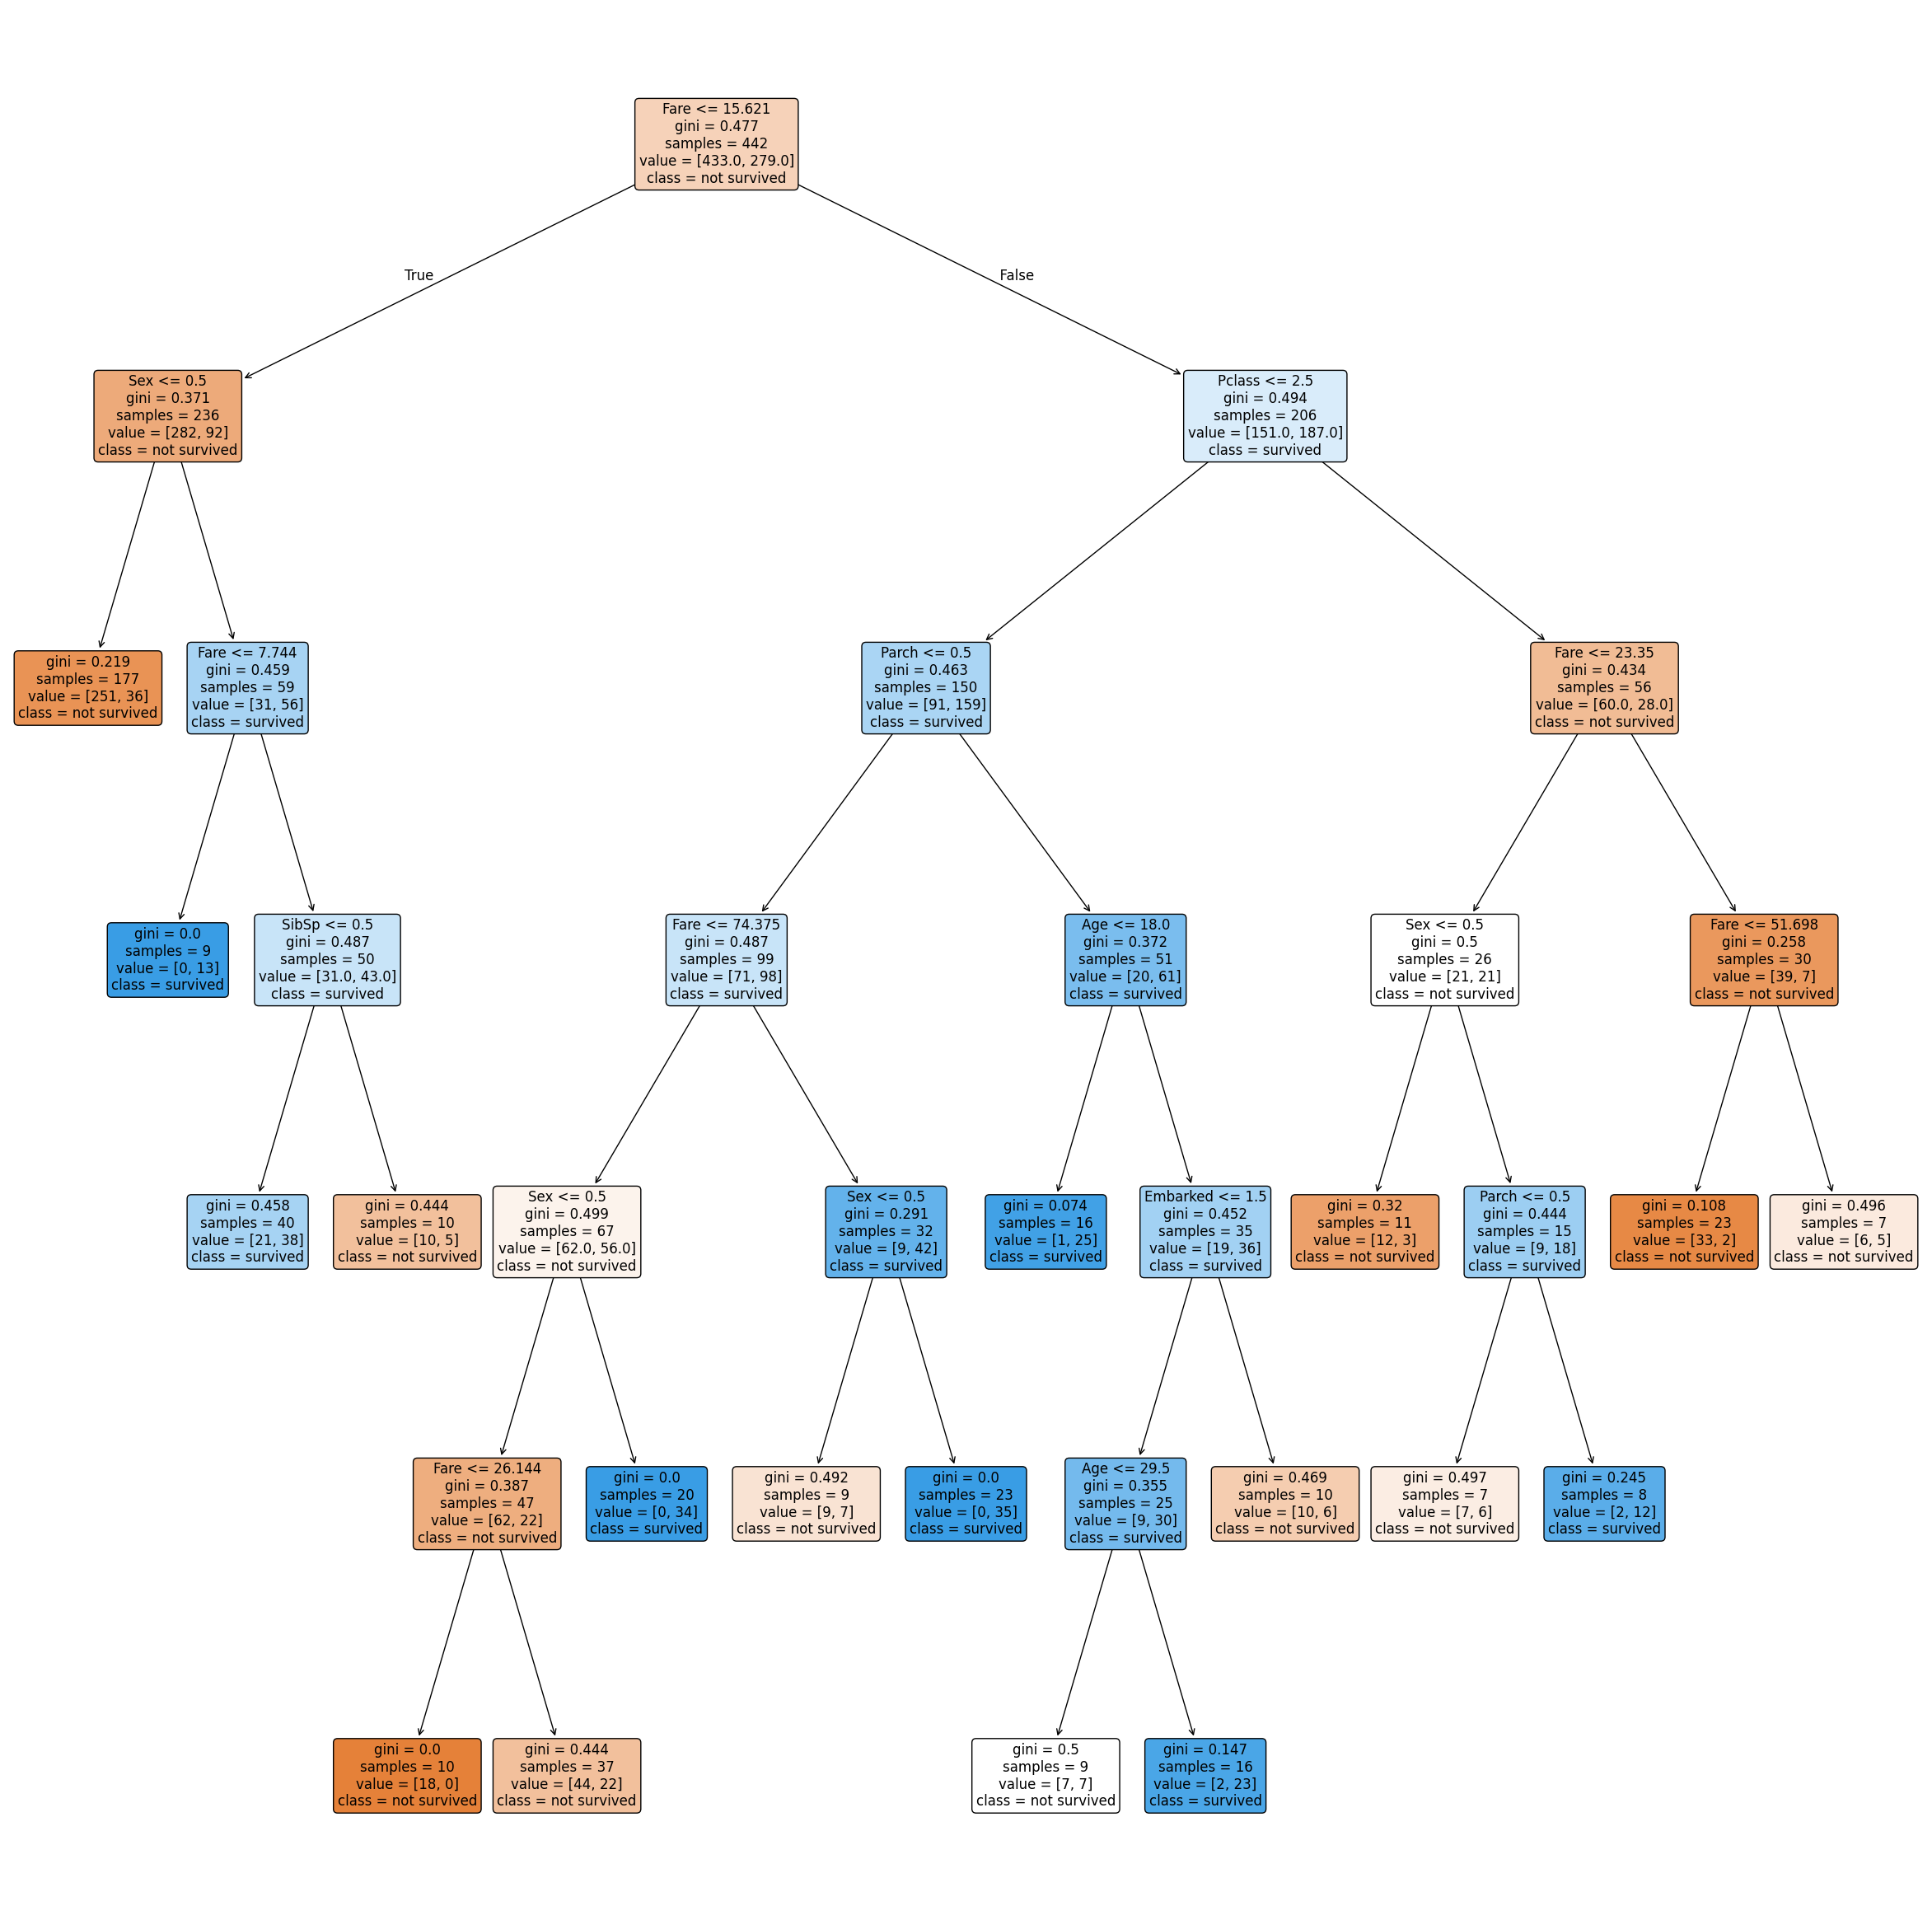

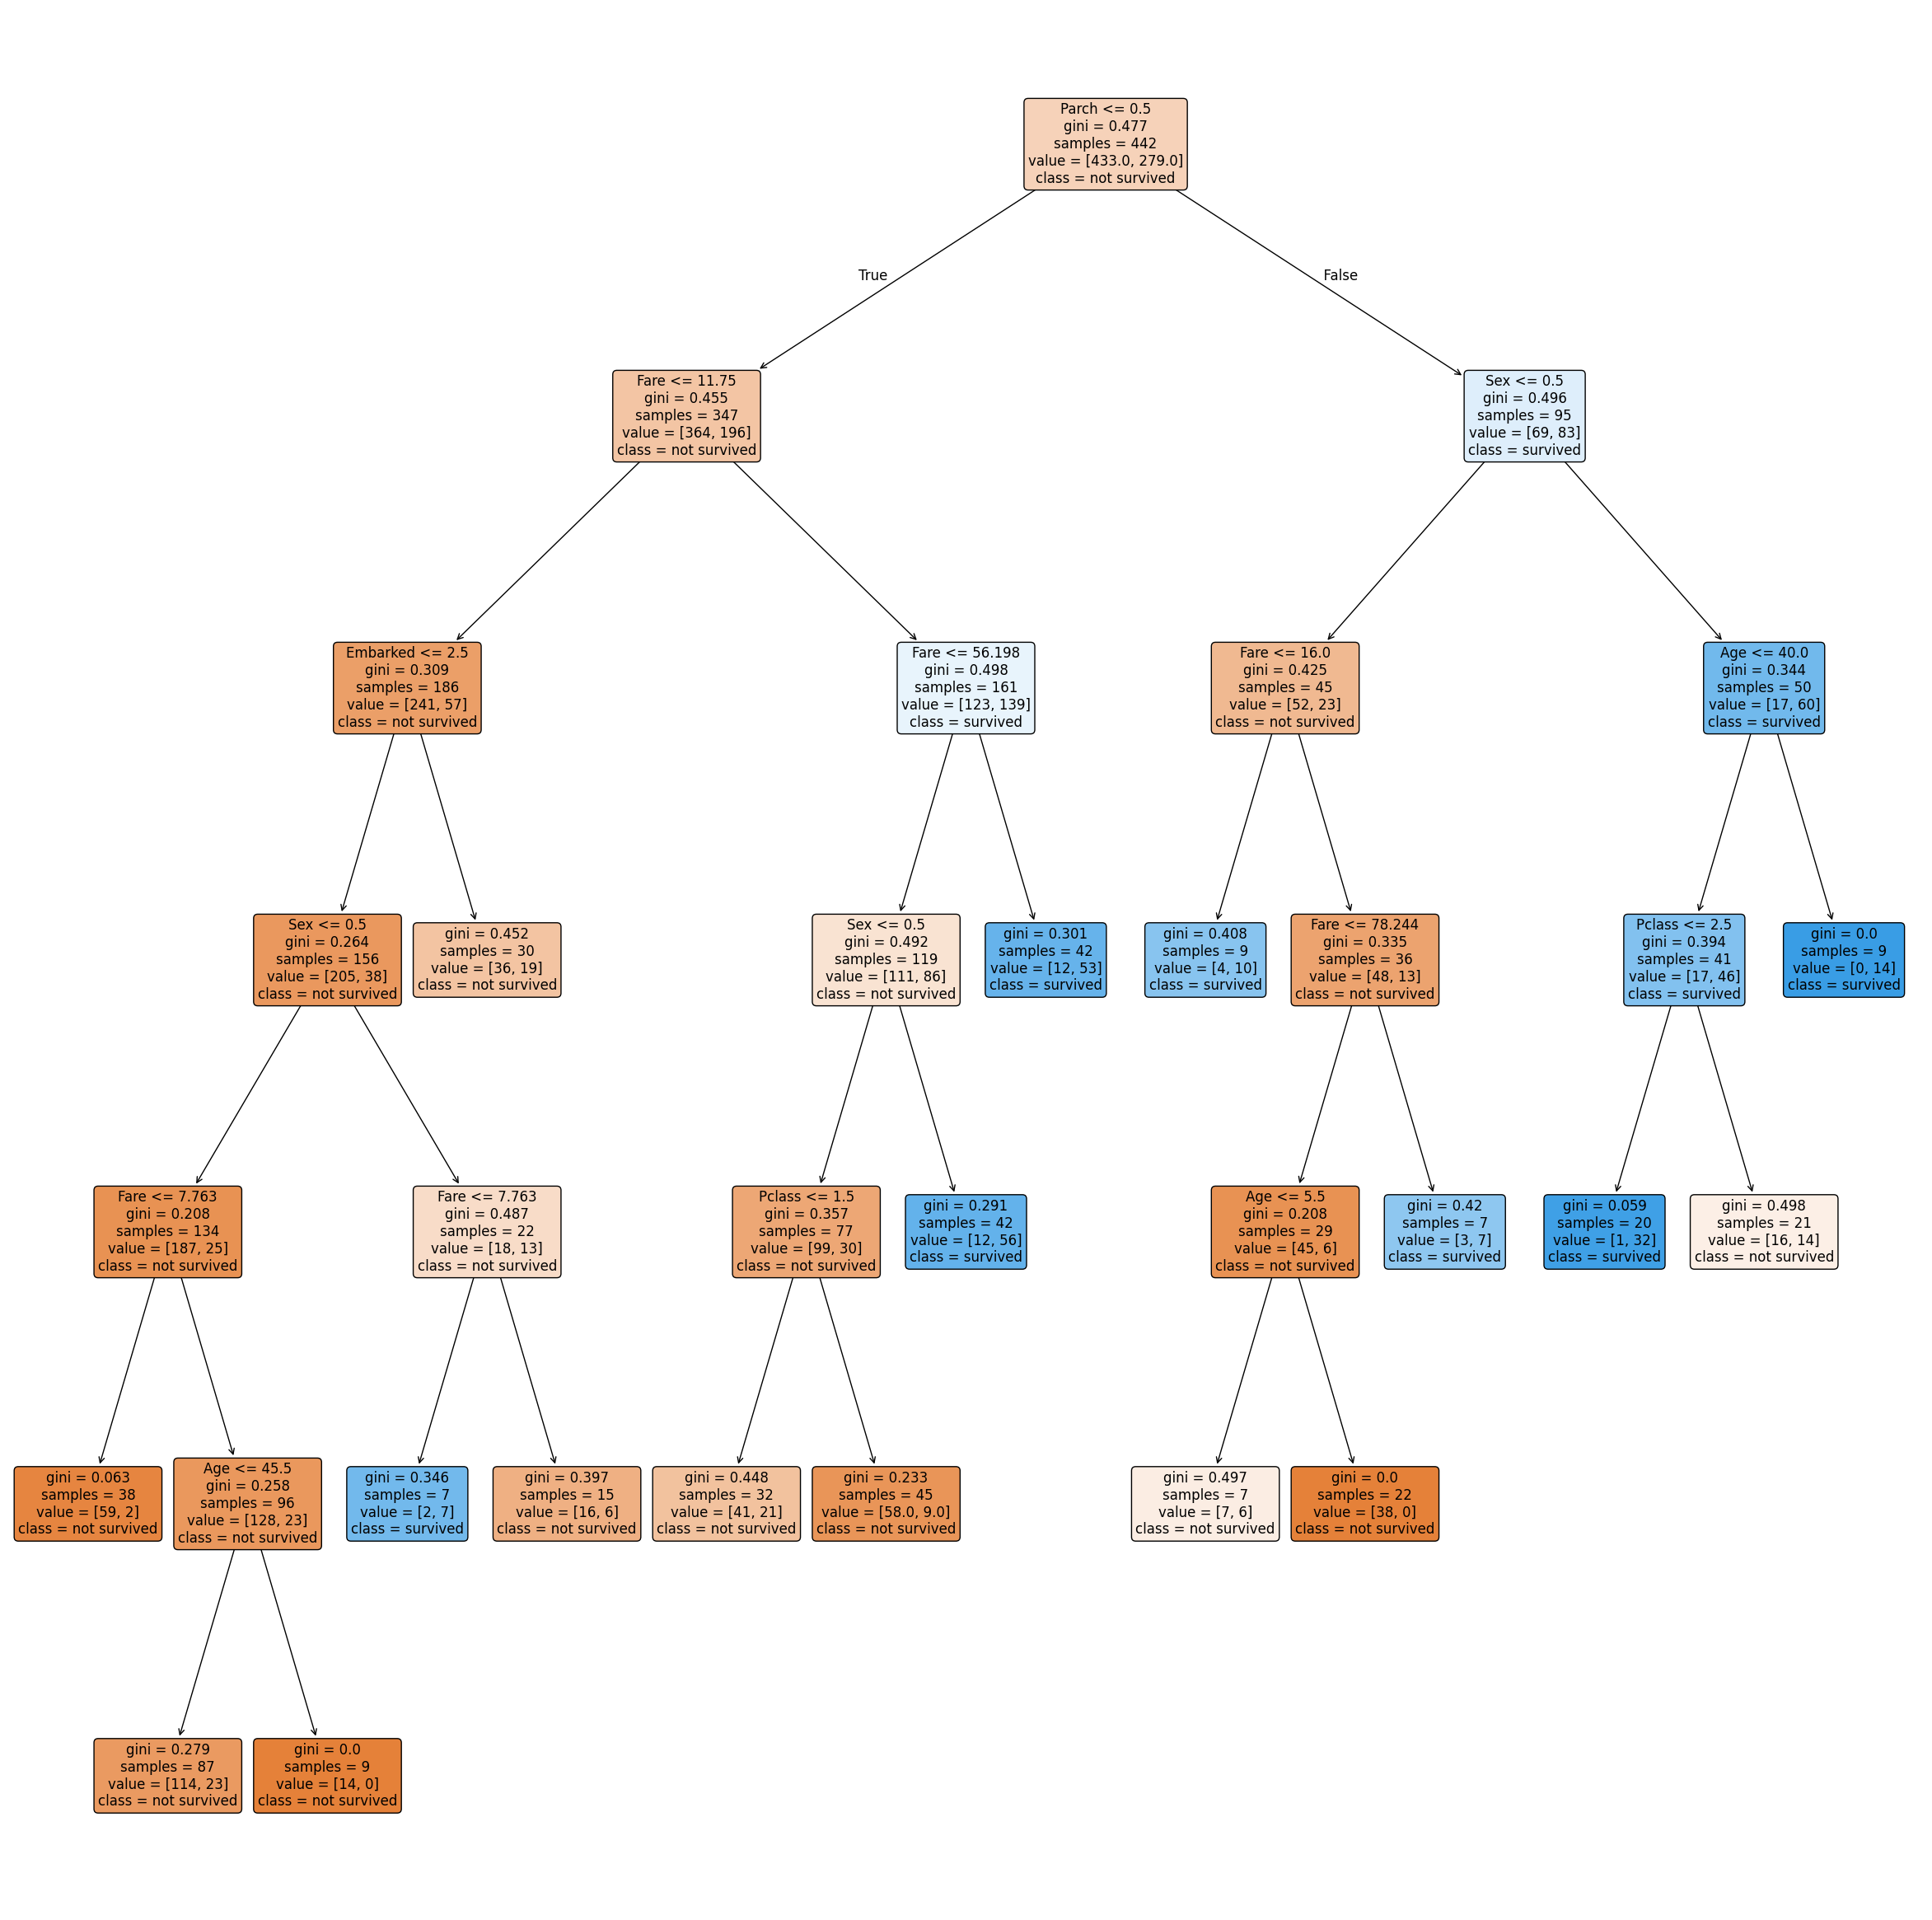

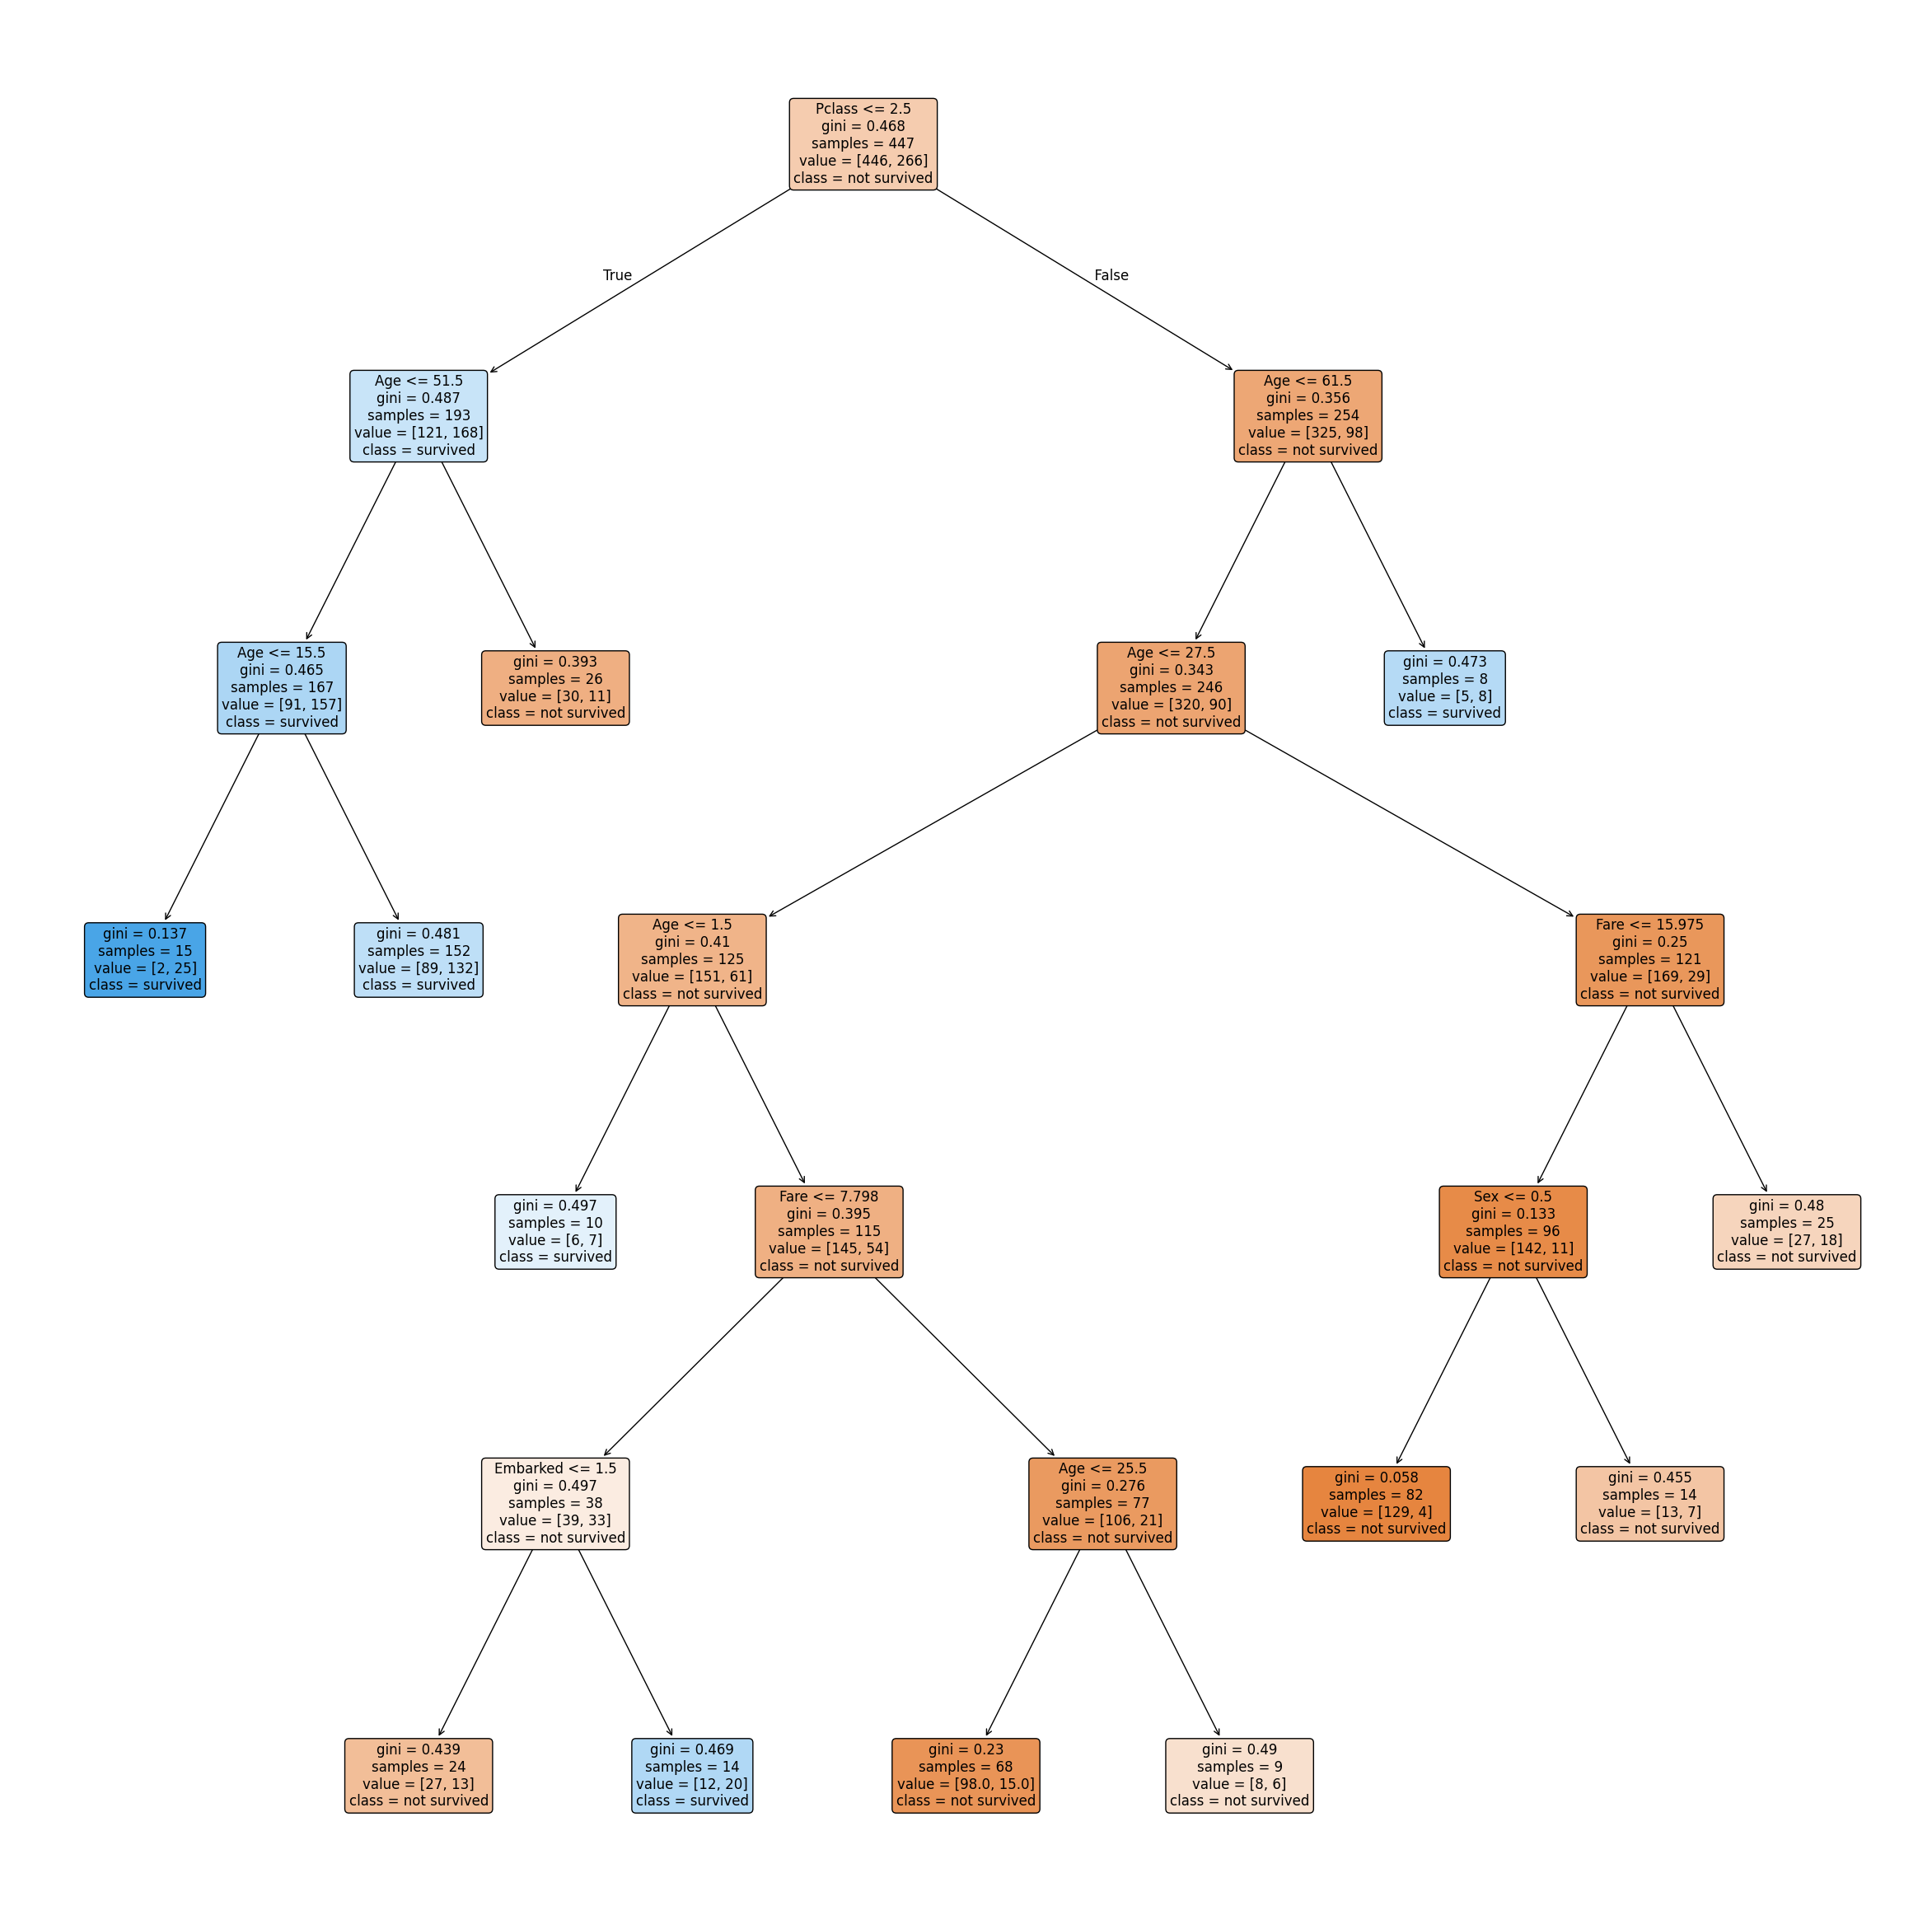

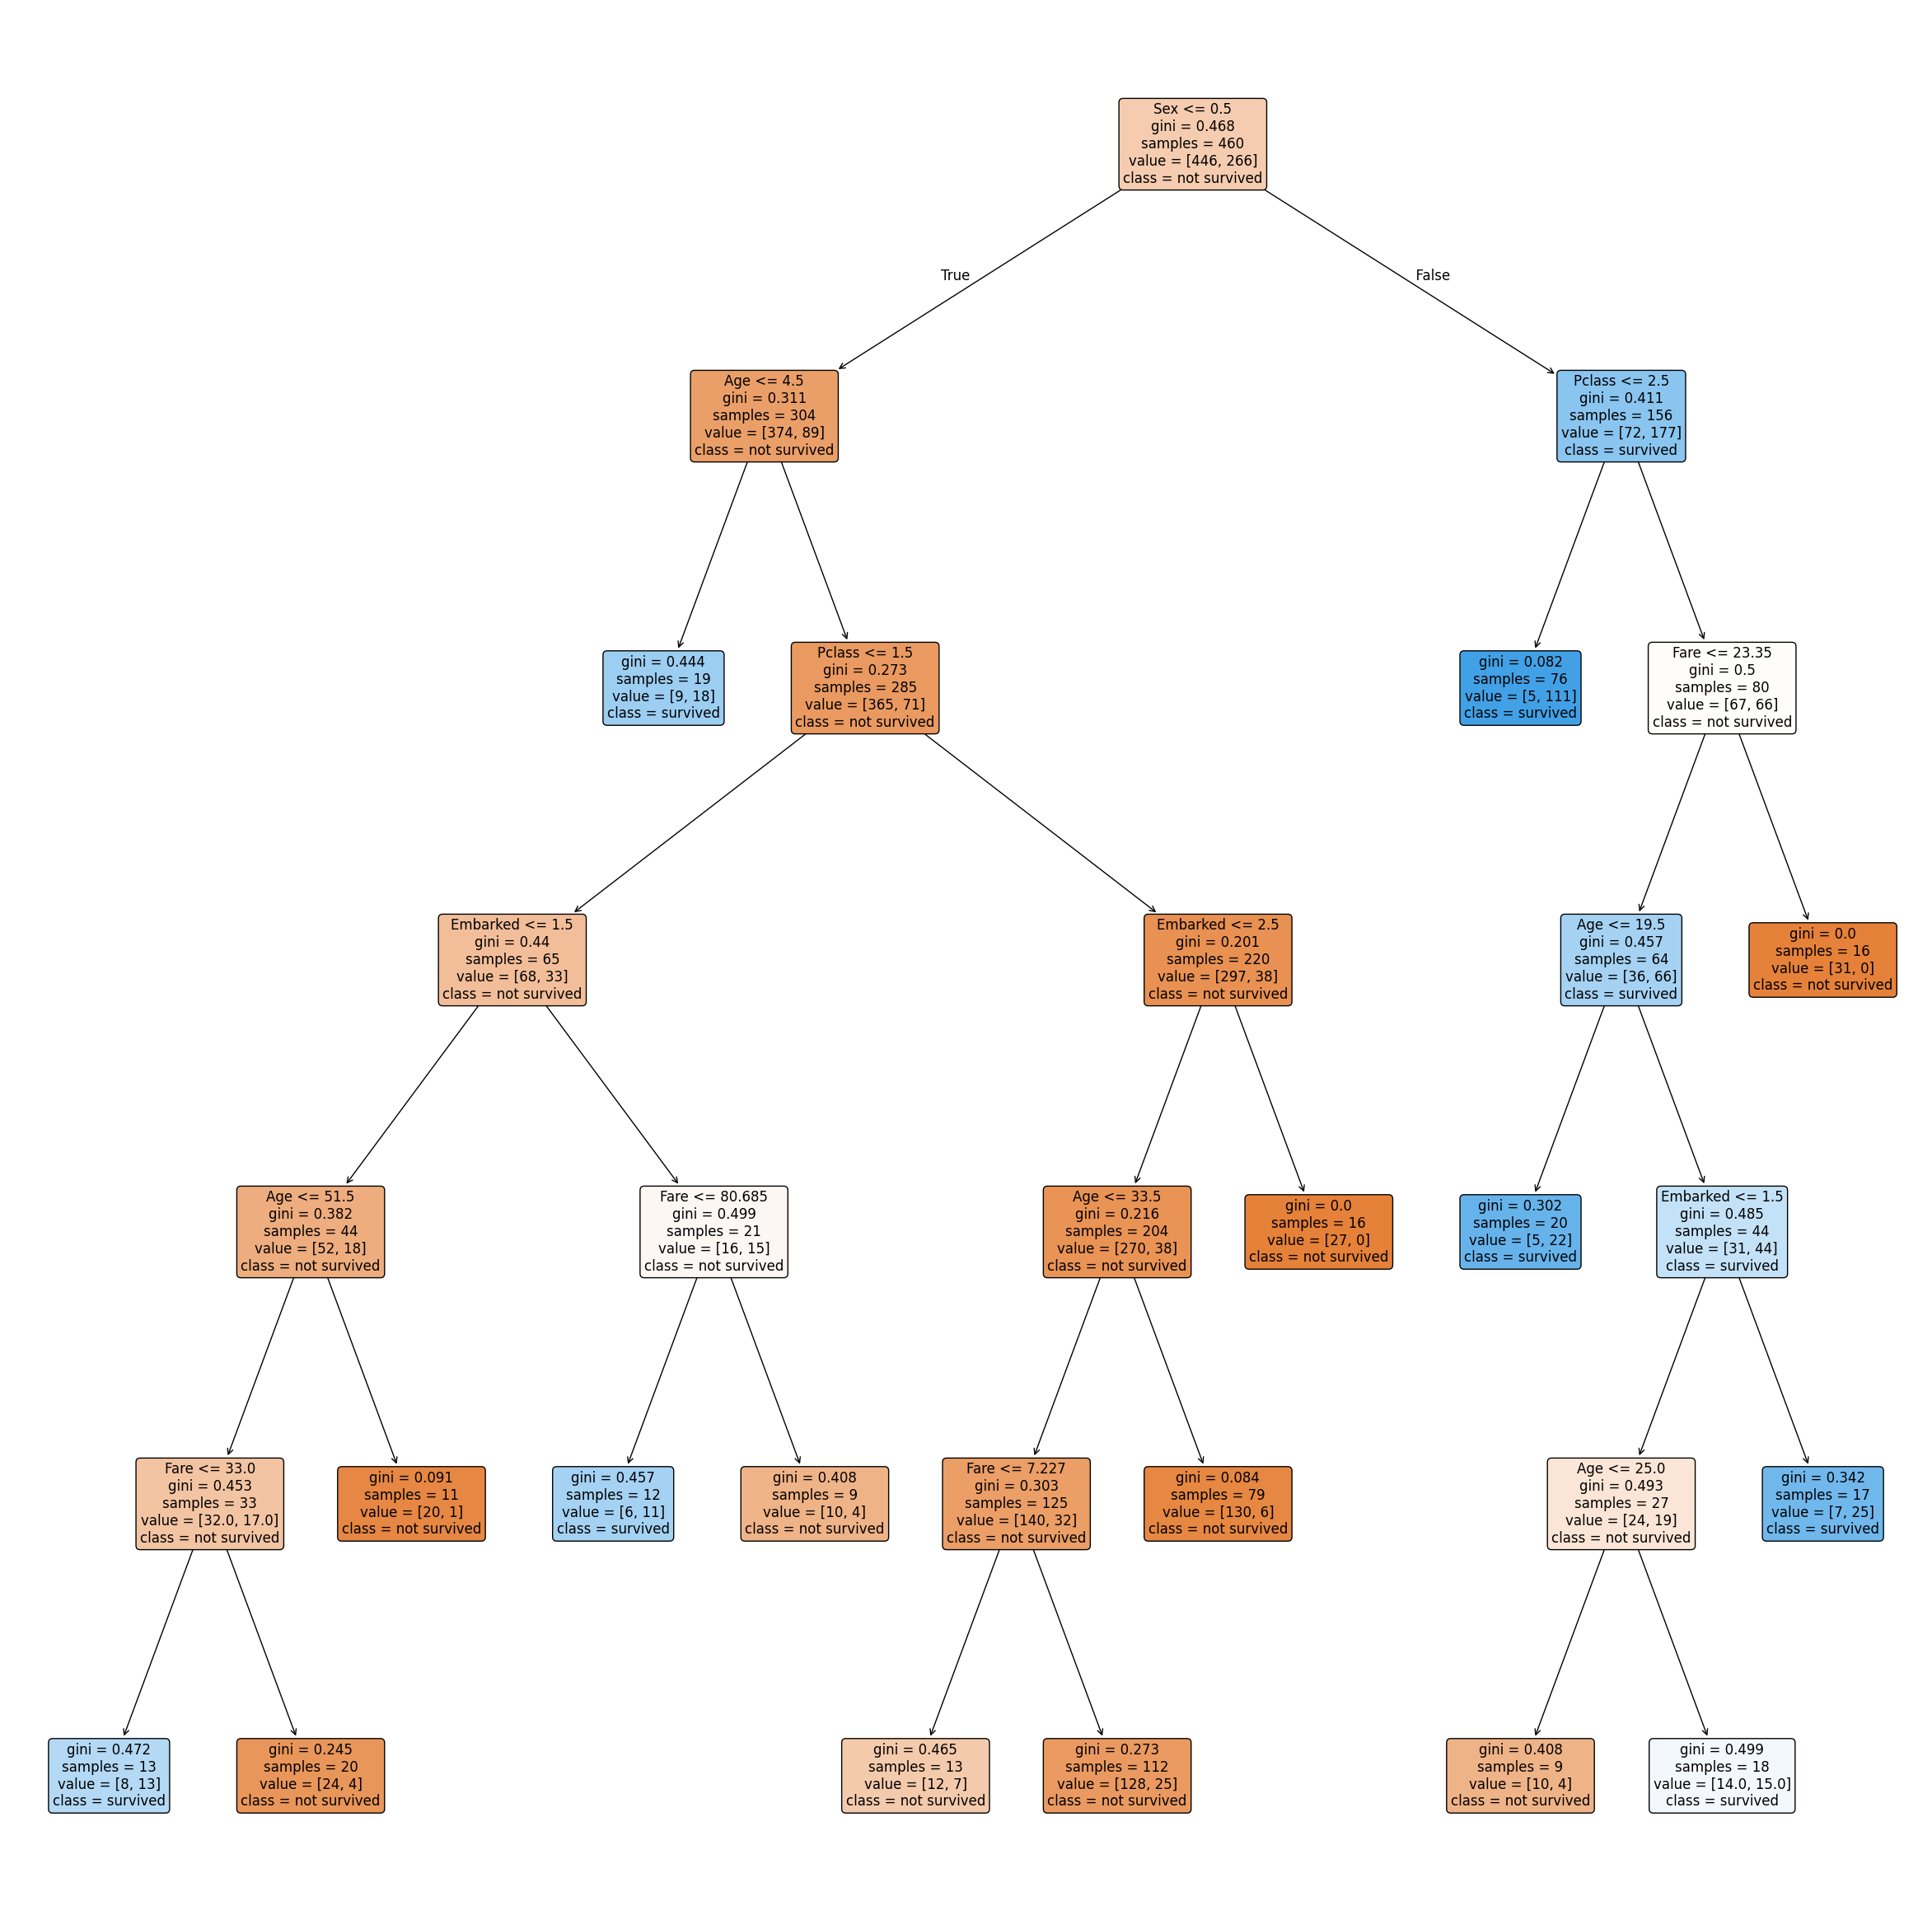

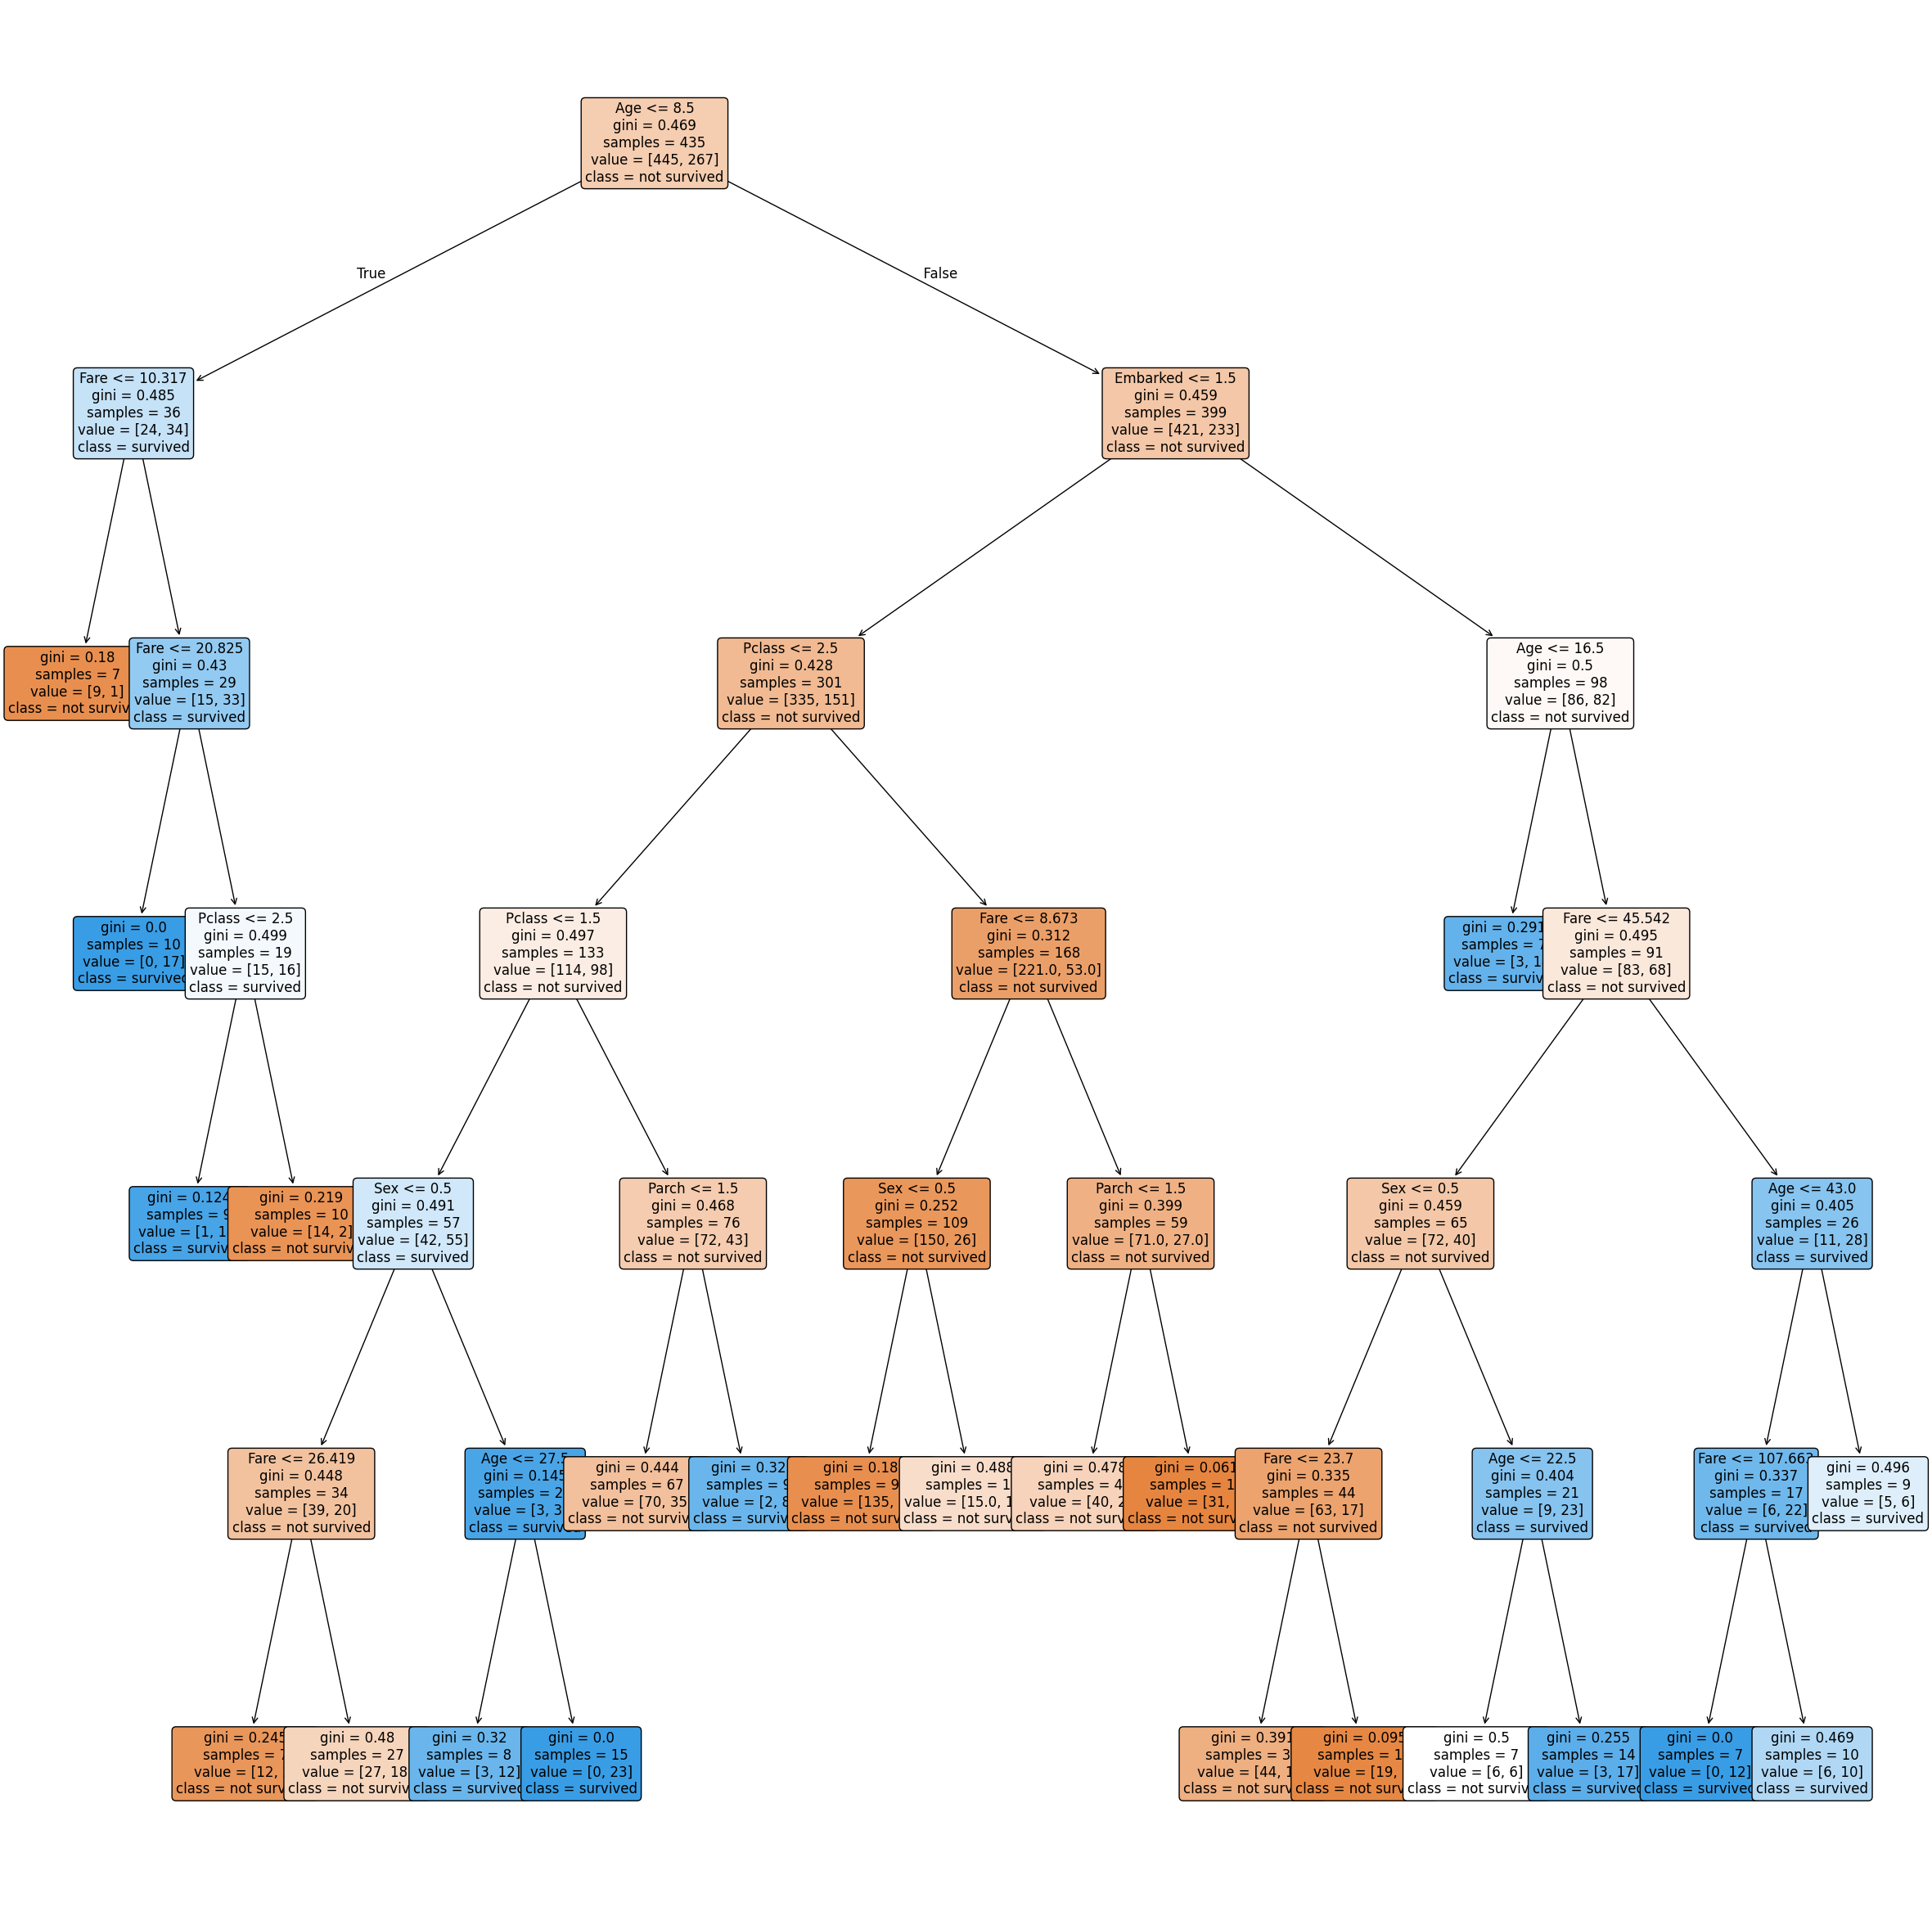

In [7]:
for estimator in clf.estimators_:
    plt.figure(figsize=(30, 30))
    plot_tree(
        estimator,
        feature_names=df.drop('Survived', axis=1).columns,
        class_names=['not survived', 'survived'],
        filled=True,
        rounded=True,
        fontsize=12
        )